In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Christian Kevin\PycharmProjects\scriptunify\venv\Scripts\python.exe -m pip install --upgrade pip' command.


PCL-C_1_Memories: 28.00%
PCL-C_2_Dreams: 50.00%
PCL-C_3_Reliving: 49.00%
PCL-C_4_Upset: 33.00%
PCL-C_5_Physical: 56.00%
PCL-C_6_ThoughtAvoidance: 37.00%
PCL-C_7_ActivityAvoidance: 43.00%
PCL-C_8_TroubleRemembering: 54.00%
PCL-C_9_NoInterest: 44.00%
PCL-C_10_FeelDistant: 22.00%
PCL-C_11_FeelNumb: 40.00%
PCL-C_12_Future_Cut_Short: 43.00%
PCL-C_13_Sleep: 41.00%
PCL-C_14_Irritability: 35.00%
PCL-C_15_Concentration: 31.00%
PCL-C_16_HyperAlert: 40.00%
PCL-C_17_Jumpy: 47.00%

Mean GPT-4o Accuracy: 40.76%
Std Dev GPT-4o Accuracy: 8.88%


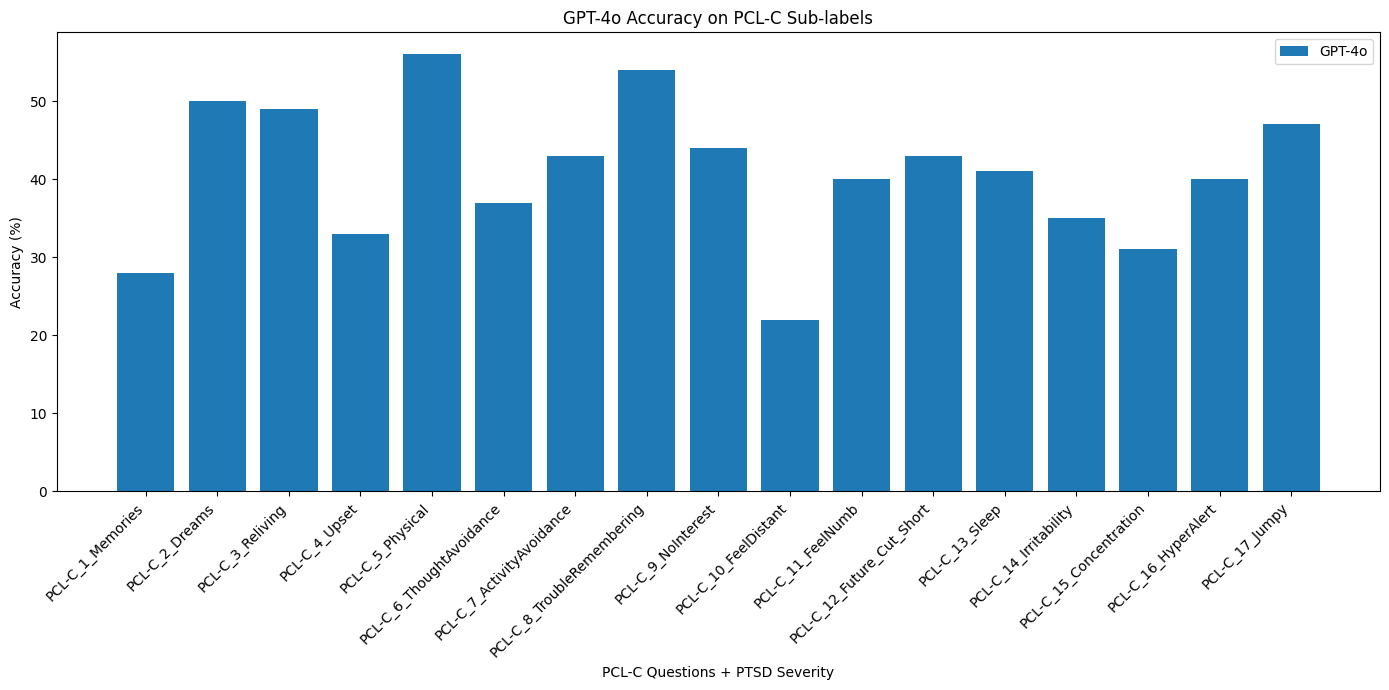

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
gpt_4o_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_GPT4o.xlsx")

# Store accuracies# Drop first column (Participant IDs) from comparison
# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
gpt_4o_data = gpt_4o_data.iloc[:, 1:-2]
gpt_4o_accuracy = []

# Compute accuracy per column (question)
for column in real_data.columns:
    total_predictions = len(real_data)
    correct_predictions = (real_data[column] == gpt_4o_data[column]).sum()
    gpt_4o_accuracy.append(correct_predictions / total_predictions * 100)

# Print per-question accuracies
for col, acc in zip(real_data.columns, gpt_4o_accuracy):
    print(f"{col}: {acc:.2f}%")

# Print mean and std
print(f"\nMean GPT-4o Accuracy: {np.mean(gpt_4o_accuracy):.2f}%")
print(f"Std Dev GPT-4o Accuracy: {np.std(gpt_4o_accuracy):.2f}%")

# Plot
indices = np.arange(len(real_data.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, gpt_4o_accuracy, color='#1f79b4', label='GPT-4o')
plt.xlabel('PCL-C Questions + PTSD Severity')
plt.ylabel('Accuracy (%)')
plt.title('GPT-4o Accuracy on PCL-C Sub-labels')
plt.xticks(indices, real_data.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


PCL-C_1_Memories: 64.00%
PCL-C_2_Dreams: 77.00%
PCL-C_3_Reliving: 73.00%
PCL-C_4_Upset: 61.00%
PCL-C_5_Physical: 73.00%
PCL-C_6_ThoughtAvoidance: 63.00%
PCL-C_7_ActivityAvoidance: 63.00%
PCL-C_8_TroubleRemembering: 75.00%
PCL-C_9_NoInterest: 70.00%
PCL-C_10_FeelDistant: 60.00%
PCL-C_11_FeelNumb: 66.00%
PCL-C_12_Future_Cut_Short: 71.00%
PCL-C_13_Sleep: 72.00%
PCL-C_14_Irritability: 70.00%
PCL-C_15_Concentration: 62.00%
PCL-C_16_HyperAlert: 67.00%
PCL-C_17_Jumpy: 72.00%

Mean GPT-4o Accuracy: 68.18%
Std Dev GPT-4o Accuracy: 5.14%


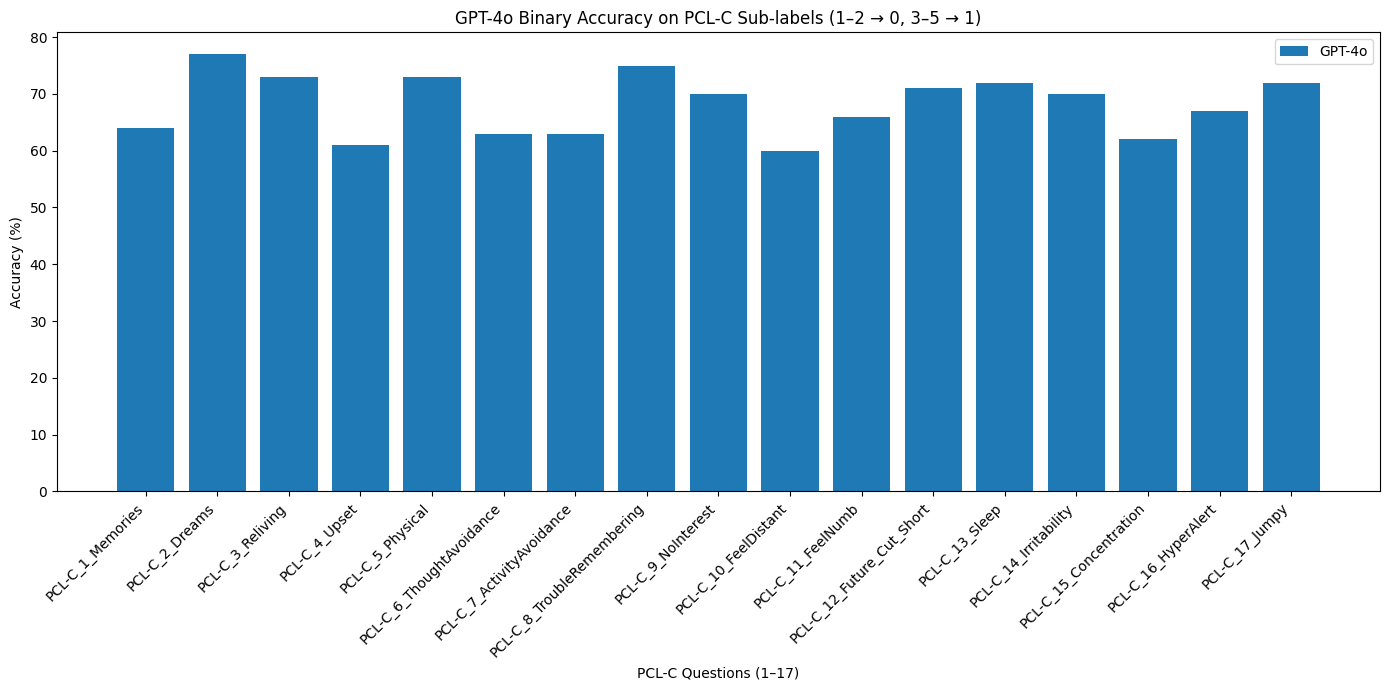

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
gpt_4o_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_GPT4o.xlsx")

real_data = real_data.iloc[:, 1:-2]
gpt_4o_data = gpt_4o_data.iloc[:, 1:-2]

# Function to binarize responses
def binarize(df):
    return df.applymap(lambda x: 0 if x in [1, 2] else 1)

# Apply binarization
real_data_bin = binarize(real_data)
gpt_4o_bin = binarize(gpt_4o_data)

# Store accuracies
gpt_4o_accuracy = []

# Compute accuracy per question
for column in real_data_bin.columns:
    total_predictions = len(real_data_bin)
    correct_predictions = (real_data_bin[column] == gpt_4o_bin[column]).sum()
    gpt_4o_accuracy.append(correct_predictions / total_predictions * 100)

# Print per-question accuracies
for col, acc in zip(real_data_bin.columns, gpt_4o_accuracy):
    print(f"{col}: {acc:.2f}%")

# Print mean and std
print(f"\nMean GPT-4o Accuracy: {np.mean(gpt_4o_accuracy):.2f}%")
print(f"Std Dev GPT-4o Accuracy: {np.std(gpt_4o_accuracy):.2f}%")

# Plot
indices = np.arange(len(real_data_bin.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, gpt_4o_accuracy, color='#1f79b4', label='GPT-4o')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('Accuracy (%)')
plt.title('GPT-4o Binary Accuracy on PCL-C Sub-labels (1–2 → 0, 3–5 → 1)')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


PCL-C_1_Memories: F1 = 33.33%, MCC = 0.25
PCL-C_2_Dreams: F1 = 25.81%, MCC = 0.28
PCL-C_3_Reliving: F1 = 12.90%, MCC = 0.22
PCL-C_4_Upset: F1 = 31.58%, MCC = 0.20
PCL-C_5_Physical: F1 = 12.90%, MCC = 0.22
PCL-C_6_ThoughtAvoidance: F1 = 24.49%, MCC = 0.24
PCL-C_7_ActivityAvoidance: F1 = 9.76%, MCC = 0.05
PCL-C_8_TroubleRemembering: F1 = 0.00%, MCC = 0.00
PCL-C_9_NoInterest: F1 = 53.12%, MCC = 0.43
PCL-C_10_FeelDistant: F1 = 41.18%, MCC = 0.26
PCL-C_11_FeelNumb: F1 = 15.00%, MCC = 0.12
PCL-C_12_Future_Cut_Short: F1 = 25.64%, MCC = 0.32
PCL-C_13_Sleep: F1 = 70.83%, MCC = 0.44
PCL-C_14_Irritability: F1 = 53.12%, MCC = 0.33
PCL-C_15_Concentration: F1 = 26.92%, MCC = 0.14
PCL-C_16_HyperAlert: F1 = 5.71%, MCC = 0.14
PCL-C_17_Jumpy: F1 = 0.00%, MCC = 0.00

Mean F1: 26.02% | Std Dev: 19.24%
Mean MCC: 0.22 | Std Dev: 0.13


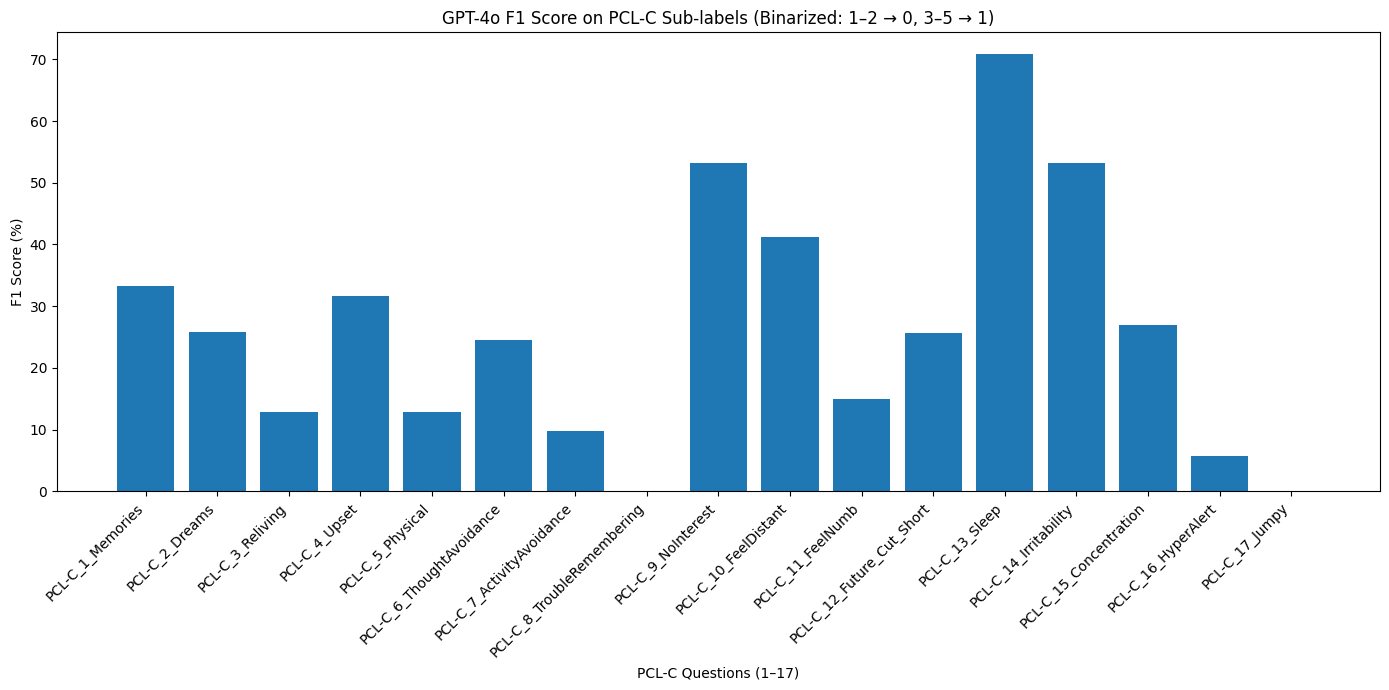

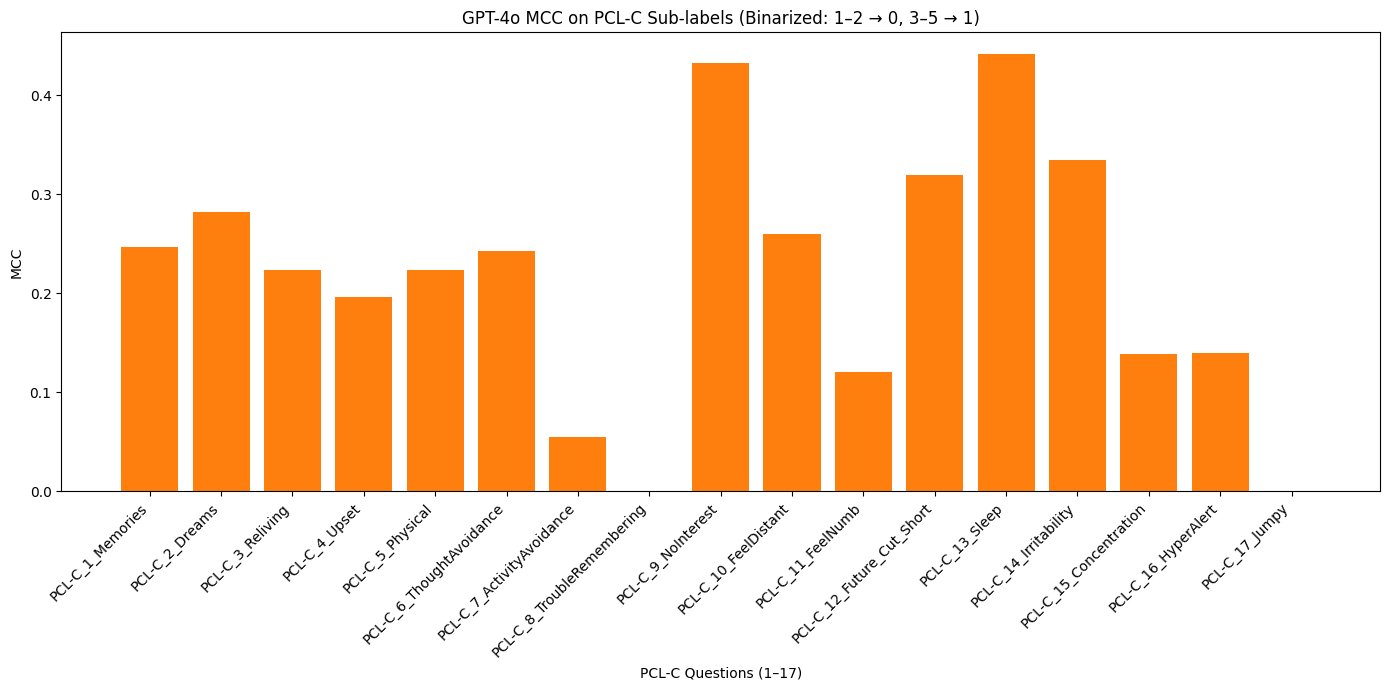

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
gpt_4o_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_GPT4o.xlsx")

# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
gpt_4o_data = gpt_4o_data.iloc[:, 1:-2]

# Function to binarize responses
def binarize(df):
    return df.applymap(lambda x: 0 if x in [1, 2] else 1)

# Apply binarization
real_data_bin = binarize(real_data)
gpt_4o_bin = binarize(gpt_4o_data)

# Store metrics
f1_scores = []
mcc_scores = []

# Compute F1 and MCC per question
for column in real_data_bin.columns:
    y_true = real_data_bin[column]
    y_pred = gpt_4o_bin[column]
    
    f1 = f1_score(y_true, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    f1_scores.append(f1 * 100)   # percentage
    mcc_scores.append(mcc)       # MCC stays in [-1, 1]

# Print per-question scores
for col, f1, mcc in zip(real_data_bin.columns, f1_scores, mcc_scores):
    print(f"{col}: F1 = {f1:.2f}%, MCC = {mcc:.2f}")

# Print mean and std
print(f"\nMean F1: {np.mean(f1_scores):.2f}% | Std Dev: {np.std(f1_scores):.2f}%")
print(f"Mean MCC: {np.mean(mcc_scores):.2f} | Std Dev: {np.std(mcc_scores):.2f}")

# Plot F1 Scores
indices = np.arange(len(real_data_bin.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, f1_scores, color='#1f77b4')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('F1 Score (%)')
plt.title('GPT-4o F1 Score on PCL-C Sub-labels (Binarized: 1–2 → 0, 3–5 → 1)')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot MCC Scores
plt.figure(figsize=(14, 7))
plt.bar(indices, mcc_scores, color='#ff7f0e')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('MCC')
plt.title('GPT-4o MCC on PCL-C Sub-labels (Binarized: 1–2 → 0, 3–5 → 1)')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()


PCL-C_1_Memories: F1 = 15.50%, MCC = 0.01
PCL-C_2_Dreams: F1 = 36.23%, MCC = 0.09
PCL-C_3_Reliving: F1 = 33.84%, MCC = 0.10
PCL-C_4_Upset: F1 = 23.26%, MCC = 0.07
PCL-C_5_Physical: F1 = 41.84%, MCC = 0.12
PCL-C_6_ThoughtAvoidance: F1 = 28.41%, MCC = 0.11
PCL-C_7_ActivityAvoidance: F1 = 27.41%, MCC = 0.08
PCL-C_8_TroubleRemembering: F1 = 38.37%, MCC = 0.04
PCL-C_9_NoInterest: F1 = 35.75%, MCC = 0.23
PCL-C_10_FeelDistant: F1 = 14.31%, MCC = -0.01
PCL-C_11_FeelNumb: F1 = 25.54%, MCC = 0.05
PCL-C_12_Future_Cut_Short: F1 = 27.59%, MCC = 0.10
PCL-C_13_Sleep: F1 = 41.48%, MCC = 0.24
PCL-C_14_Irritability: F1 = 33.58%, MCC = 0.10
PCL-C_15_Concentration: F1 = 22.15%, MCC = -0.01
PCL-C_16_HyperAlert: F1 = 23.02%, MCC = 0.02
PCL-C_17_Jumpy: F1 = 30.05%, MCC = 0.00

Mean F1: 29.31% | Std Dev: 7.97%
Mean MCC: 0.08 | Std Dev: 0.07


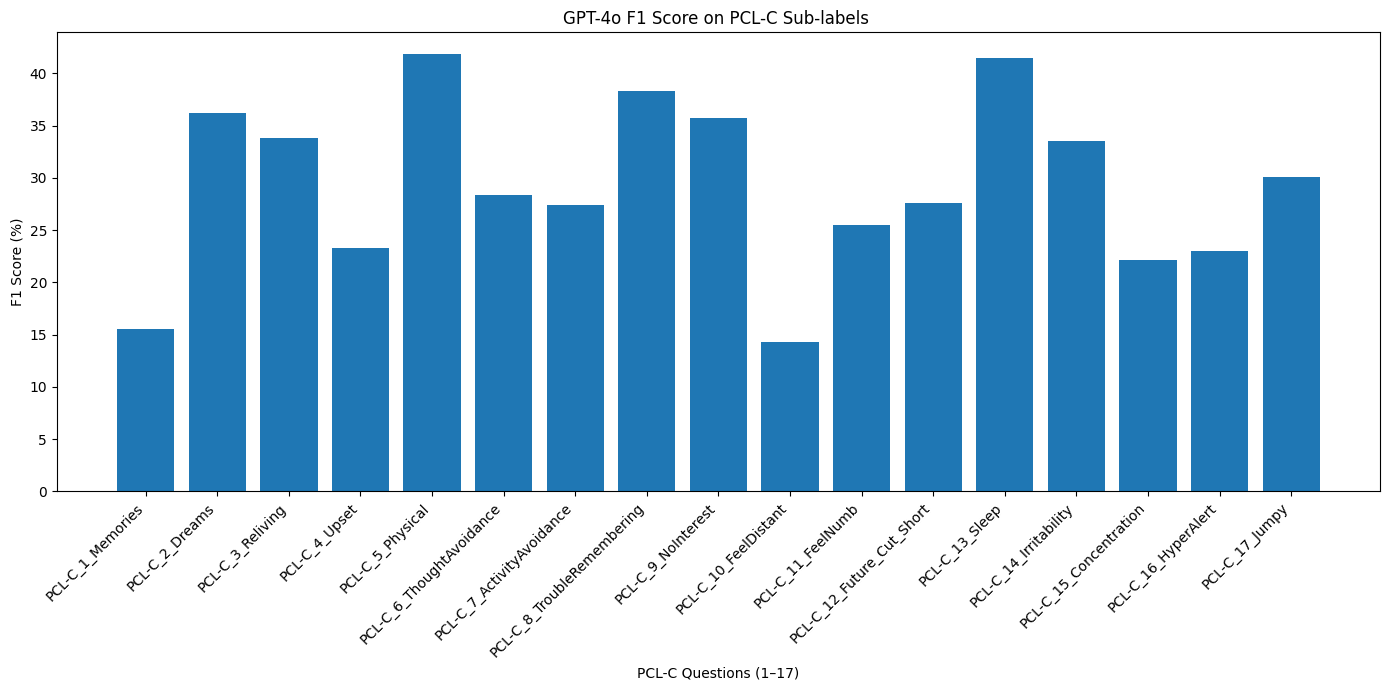

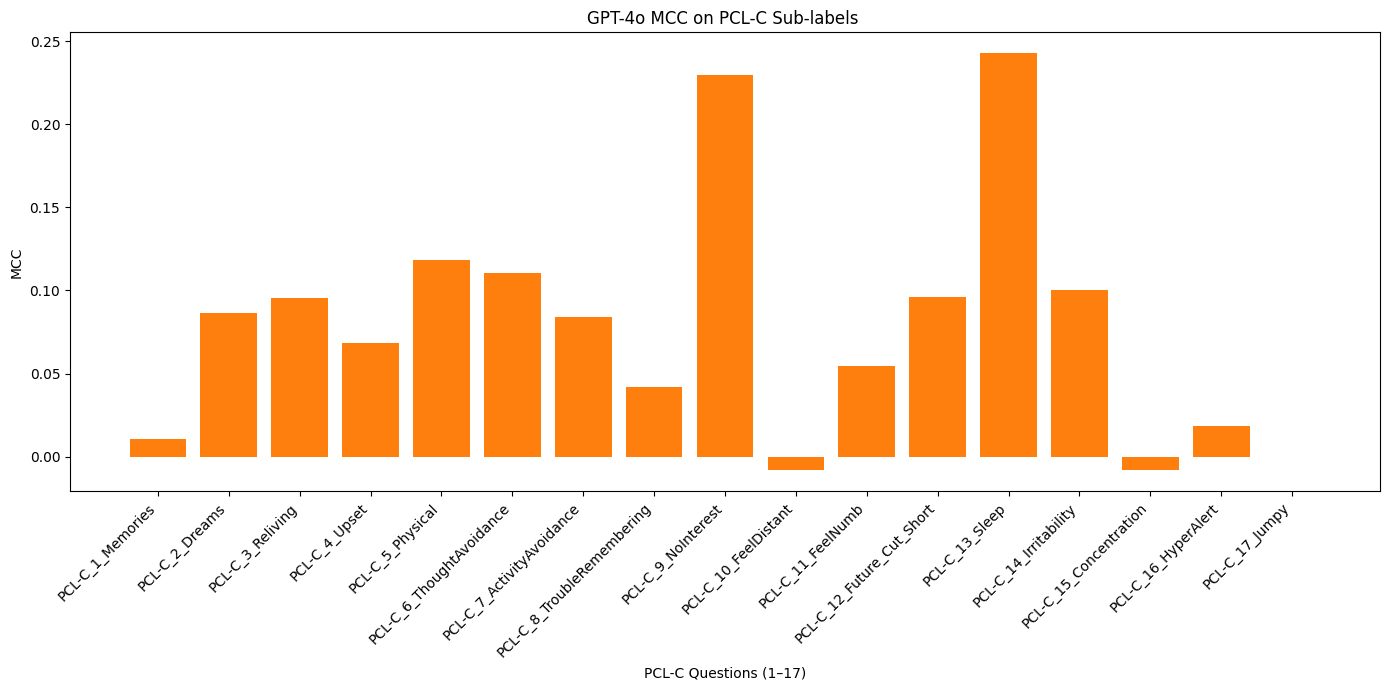

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
gpt_4o_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_GPT4o.xlsx")

# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
gpt_4o_data = gpt_4o_data.iloc[:, 1:-2]


# Store metrics
f1_scores = []
mcc_scores = []

# Compute F1 and MCC per question
for column in real_data.columns:
    y_true = real_data[column]
    y_pred = gpt_4o_data[column]
    
    f1 = f1_score(y_true, y_pred, average= 'weighted')
    mcc = matthews_corrcoef(y_true, y_pred)
    
    f1_scores.append(f1 * 100)   # percentage
    mcc_scores.append(mcc)       # MCC stays in [-1, 1]

# Print per-question scores
for col, f1, mcc in zip(real_data_bin.columns, f1_scores, mcc_scores):
    print(f"{col}: F1 = {f1:.2f}%, MCC = {mcc:.2f}")

# Print mean and std
print(f"\nMean F1: {np.mean(f1_scores):.2f}% | Std Dev: {np.std(f1_scores):.2f}%")
print(f"Mean MCC: {np.mean(mcc_scores):.2f} | Std Dev: {np.std(mcc_scores):.2f}")

# Plot F1 Scores
indices = np.arange(len(real_data_bin.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, f1_scores, color='#1f77b4')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('F1 Score (%)')
plt.title('GPT-4o F1 Score on PCL-C Sub-labels ')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot MCC Scores
plt.figure(figsize=(14, 7))
plt.bar(indices, mcc_scores, color='#ff7f0e')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('MCC')
plt.title('GPT-4o MCC on PCL-C Sub-labels ')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()


PCL-C_1_Memories: F1 = 47.76%, MCC = 0.26
PCL-C_2_Dreams: F1 = 31.25%, MCC = 0.33
PCL-C_3_Reliving: F1 = 6.45%, MCC = 0.07
PCL-C_4_Upset: F1 = 48.48%, MCC = 0.31
PCL-C_5_Physical: F1 = 18.18%, MCC = 0.21
PCL-C_6_ThoughtAvoidance: F1 = 47.62%, MCC = 0.31
PCL-C_7_ActivityAvoidance: F1 = 37.74%, MCC = 0.23
PCL-C_8_TroubleRemembering: F1 = 21.43%, MCC = 0.30
PCL-C_9_NoInterest: F1 = 59.15%, MCC = 0.43
PCL-C_10_FeelDistant: F1 = 73.56%, MCC = 0.56
PCL-C_11_FeelNumb: F1 = 35.29%, MCC = 0.19
PCL-C_12_Future_Cut_Short: F1 = 41.86%, MCC = 0.44
PCL-C_13_Sleep: F1 = 70.10%, MCC = 0.42
PCL-C_14_Irritability: F1 = 51.52%, MCC = 0.29
PCL-C_15_Concentration: F1 = 32.73%, MCC = 0.17
PCL-C_16_HyperAlert: F1 = 20.51%, MCC = 0.22
PCL-C_17_Jumpy: F1 = 0.00%, MCC = 0.00

Mean F1: 37.86% | Std Dev: 19.90%
Mean MCC: 0.28 | Std Dev: 0.13


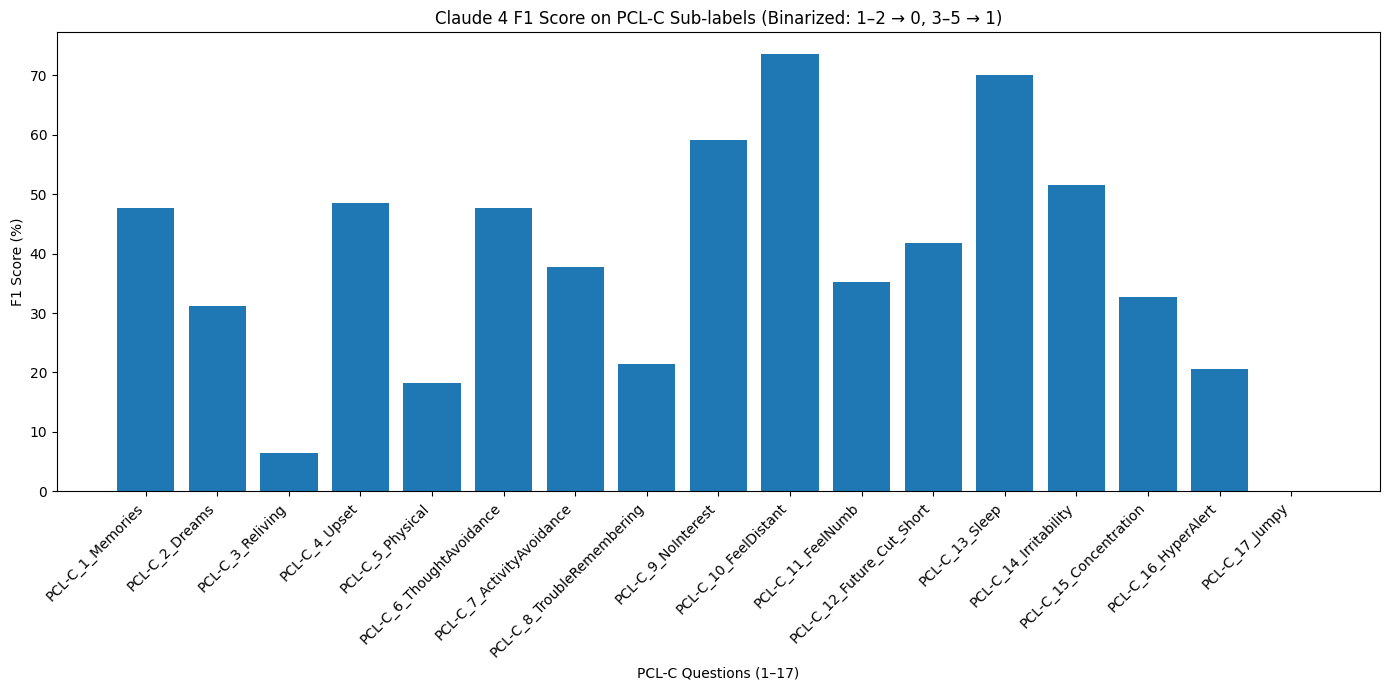

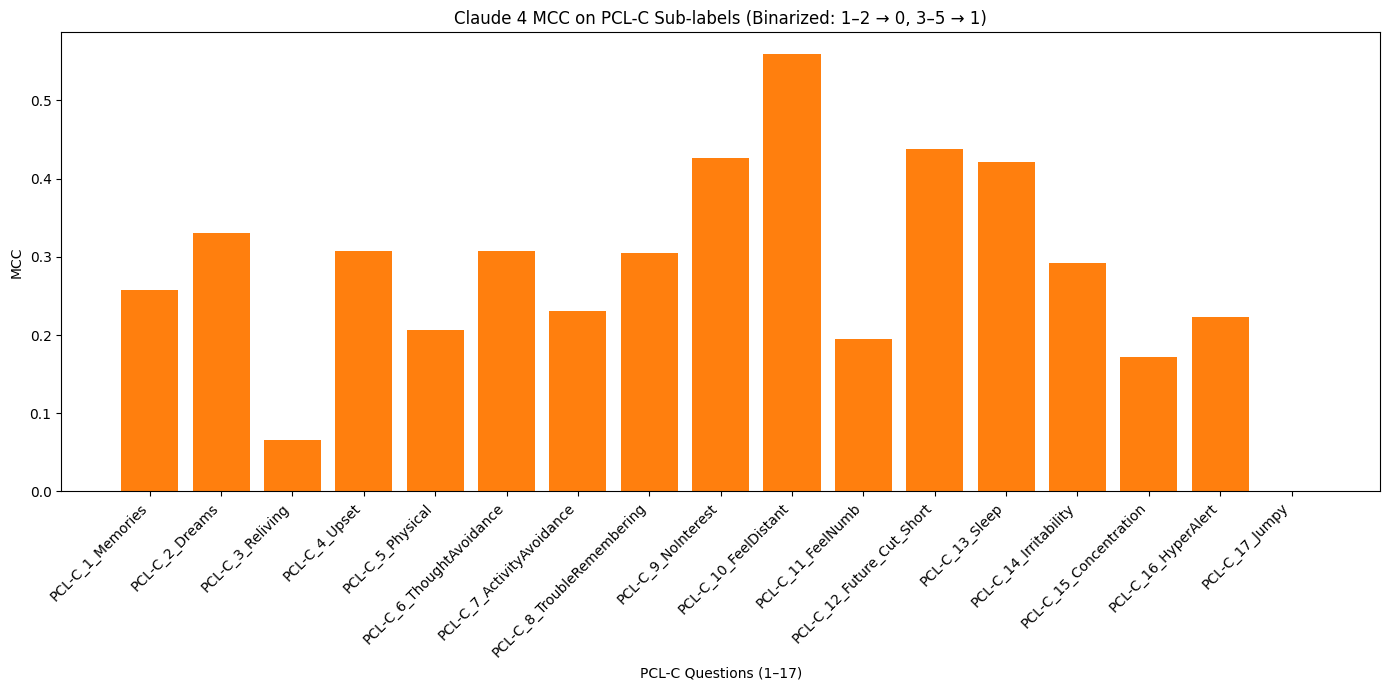

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
claude_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_Claude_4.xlsx")

# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
claude_data = claude_data.iloc[:, 1:-2]

# Function to binarize responses
def binarize(df):
    return df.applymap(lambda x: 0 if x in [1, 2] else 1)

# Apply binarization
real_data_bin = binarize(real_data)
claude_bin = binarize(claude_data)

# Store metrics
f1_scores = []
mcc_scores = []

# Compute F1 and MCC per question
for column in real_data_bin.columns:
    y_true = real_data_bin[column]
    y_pred = claude_bin[column]
    
    f1 = f1_score(y_true, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    f1_scores.append(f1 * 100)   # percentage
    mcc_scores.append(mcc)       # MCC stays in [-1, 1]

# Print per-question scores
for col, f1, mcc in zip(real_data_bin.columns, f1_scores, mcc_scores):
    print(f"{col}: F1 = {f1:.2f}%, MCC = {mcc:.2f}")

# Print mean and std
print(f"\nMean F1: {np.mean(f1_scores):.2f}% | Std Dev: {np.std(f1_scores):.2f}%")
print(f"Mean MCC: {np.mean(mcc_scores):.2f} | Std Dev: {np.std(mcc_scores):.2f}")

# Plot F1 Scores
indices = np.arange(len(real_data_bin.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, f1_scores, color='#1f77b4')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('F1 Score (%)')
plt.title('Claude 4 F1 Score on PCL-C Sub-labels (Binarized: 1–2 → 0, 3–5 → 1)')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot MCC Scores
plt.figure(figsize=(14, 7))
plt.bar(indices, mcc_scores, color='#ff7f0e')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('MCC')
plt.title('Claude 4 MCC on PCL-C Sub-labels (Binarized: 1–2 → 0, 3–5 → 1)')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()


PCL-C_1_Memories: F1 = 34.38%, MCC = 0.21
PCL-C_2_Dreams: F1 = 37.97%, MCC = 0.12
PCL-C_3_Reliving: F1 = 31.56%, MCC = 0.04
PCL-C_4_Upset: F1 = 26.86%, MCC = 0.09
PCL-C_5_Physical: F1 = 40.88%, MCC = 0.10
PCL-C_6_ThoughtAvoidance: F1 = 30.35%, MCC = 0.12
PCL-C_7_ActivityAvoidance: F1 = 35.40%, MCC = 0.17
PCL-C_8_TroubleRemembering: F1 = 49.70%, MCC = 0.25
PCL-C_9_NoInterest: F1 = 40.57%, MCC = 0.26
PCL-C_10_FeelDistant: F1 = 29.37%, MCC = 0.17
PCL-C_11_FeelNumb: F1 = 35.97%, MCC = 0.17
PCL-C_12_Future_Cut_Short: F1 = 31.28%, MCC = 0.14
PCL-C_13_Sleep: F1 = 42.36%, MCC = 0.26
PCL-C_14_Irritability: F1 = 35.69%, MCC = 0.13
PCL-C_15_Concentration: F1 = 30.60%, MCC = 0.10
PCL-C_16_HyperAlert: F1 = 26.26%, MCC = 0.03
PCL-C_17_Jumpy: F1 = 31.96%, MCC = 0.04

Mean F1: 34.77% | Std Dev: 5.92%
Mean MCC: 0.14 | Std Dev: 0.07


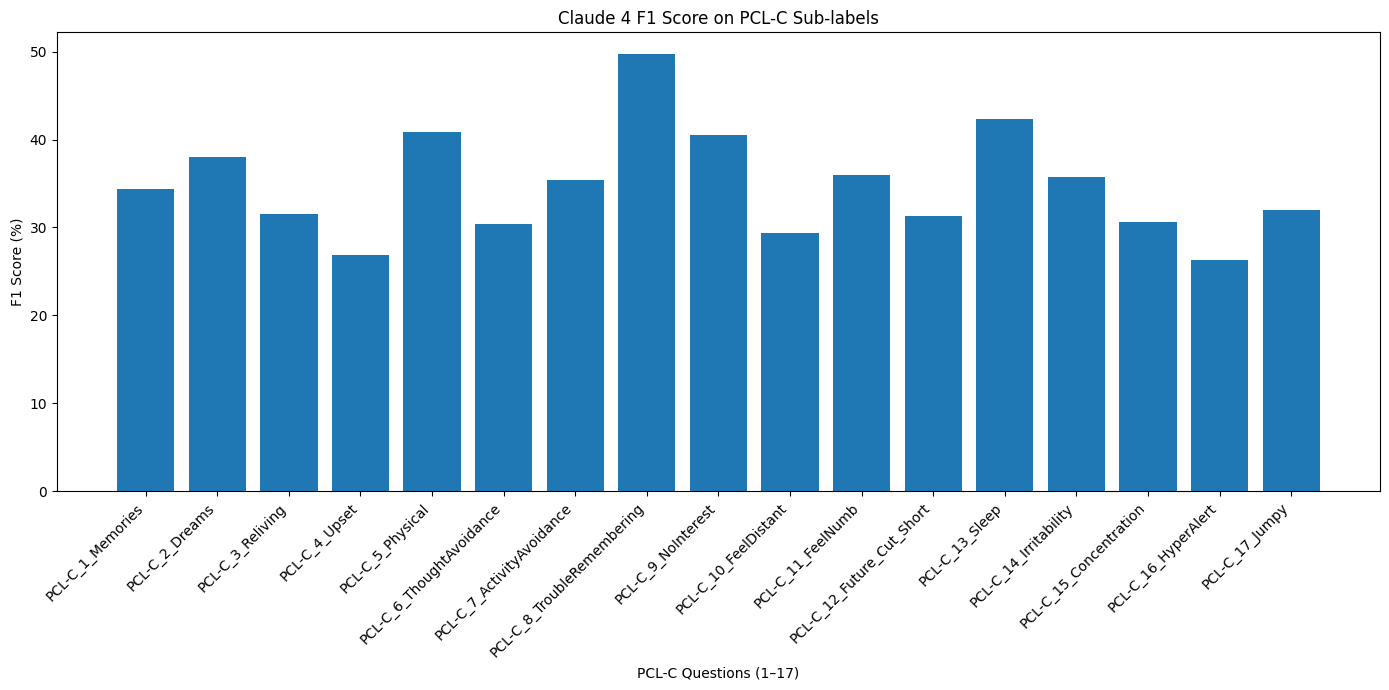

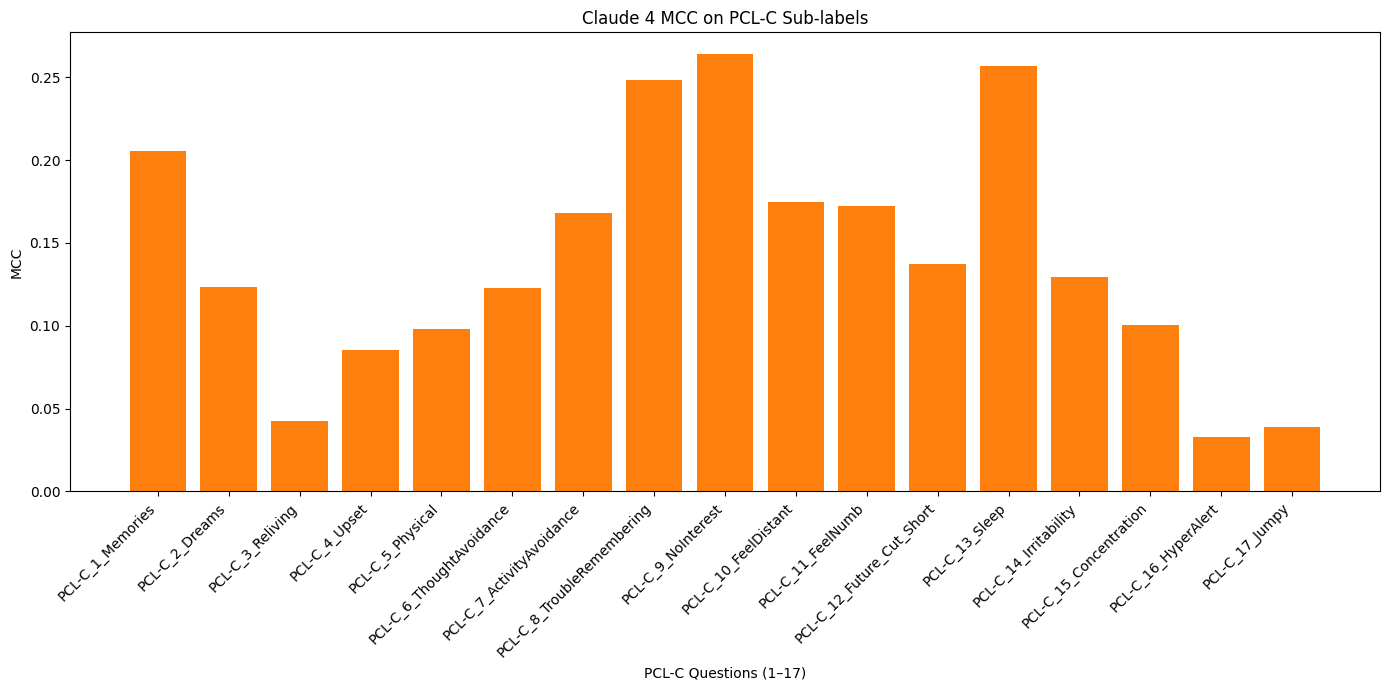

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
claude_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_Claude_4.xlsx")

# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
claude_data = claude_data.iloc[:, 1:-2]


# Store metrics
f1_scores = []
mcc_scores = []

# Compute F1 and MCC per question
for column in real_data.columns:
    y_true = real_data[column]
    y_pred = claude_data[column]
    
    f1 = f1_score(y_true, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_true, y_pred)
    
    f1_scores.append(f1 * 100)   # percentage
    mcc_scores.append(mcc)       # MCC stays in [-1, 1]

# Print per-question scores
for col, f1, mcc in zip(real_data_bin.columns, f1_scores, mcc_scores):
    print(f"{col}: F1 = {f1:.2f}%, MCC = {mcc:.2f}")

# Print mean and std
print(f"\nMean F1: {np.mean(f1_scores):.2f}% | Std Dev: {np.std(f1_scores):.2f}%")
print(f"Mean MCC: {np.mean(mcc_scores):.2f} | Std Dev: {np.std(mcc_scores):.2f}")

# Plot F1 Scores
indices = np.arange(len(real_data_bin.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, f1_scores, color='#1f77b4')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('F1 Score (%)')
plt.title('Claude 4 F1 Score on PCL-C Sub-labels')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot MCC Scores
plt.figure(figsize=(14, 7))
plt.bar(indices, mcc_scores, color='#ff7f0e')
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('MCC')
plt.title('Claude 4 MCC on PCL-C Sub-labels')
plt.xticks(indices, real_data_bin.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()


PCL-C_1_Memories: F1 = 29.36%, MCC = 0.14
PCL-C_2_Dreams: F1 = 35.96%, MCC = 0.09
PCL-C_3_Reliving: F1 = 34.06%, MCC = 0.09
PCL-C_4_Upset: F1 = 32.27%, MCC = 0.16
PCL-C_5_Physical: F1 = 43.46%, MCC = 0.15
PCL-C_6_ThoughtAvoidance: F1 = 32.28%, MCC = 0.15
PCL-C_7_ActivityAvoidance: F1 = 31.56%, MCC = 0.11
PCL-C_8_TroubleRemembering: F1 = 42.64%, MCC = 0.15
PCL-C_9_NoInterest: F1 = 37.20%, MCC = 0.23
PCL-C_10_FeelDistant: F1 = 29.36%, MCC = 0.18
PCL-C_11_FeelNumb: F1 = 32.63%, MCC = 0.14
PCL-C_12_Future_Cut_Short: F1 = 34.91%, MCC = 0.16
PCL-C_13_Sleep: F1 = 51.25%, MCC = 0.38
PCL-C_14_Irritability: F1 = 37.33%, MCC = 0.14
PCL-C_15_Concentration: F1 = 28.67%, MCC = 0.14
PCL-C_16_HyperAlert: F1 = 26.62%, MCC = 0.06
PCL-C_17_Jumpy: F1 = 30.26%, MCC = 0.02

Mean F1: 34.69% | Std Dev: 6.10%
Mean MCC: 0.15 | Std Dev: 0.07


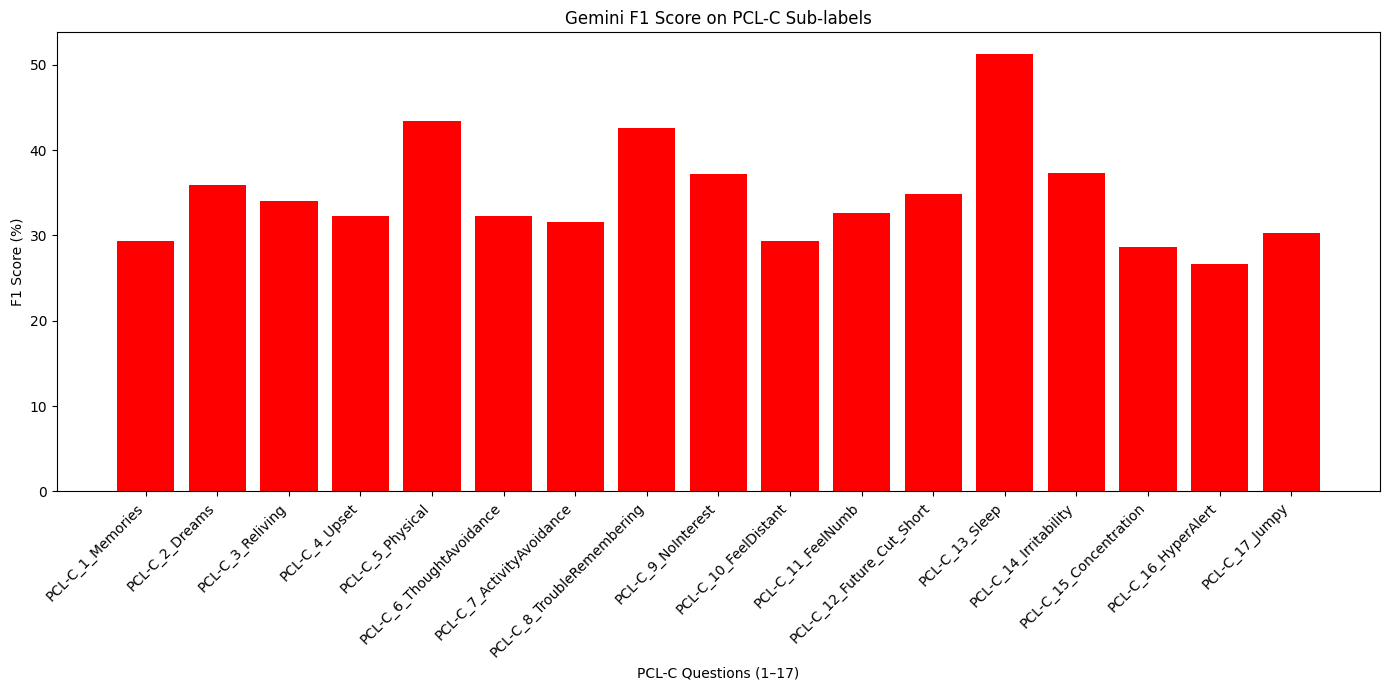

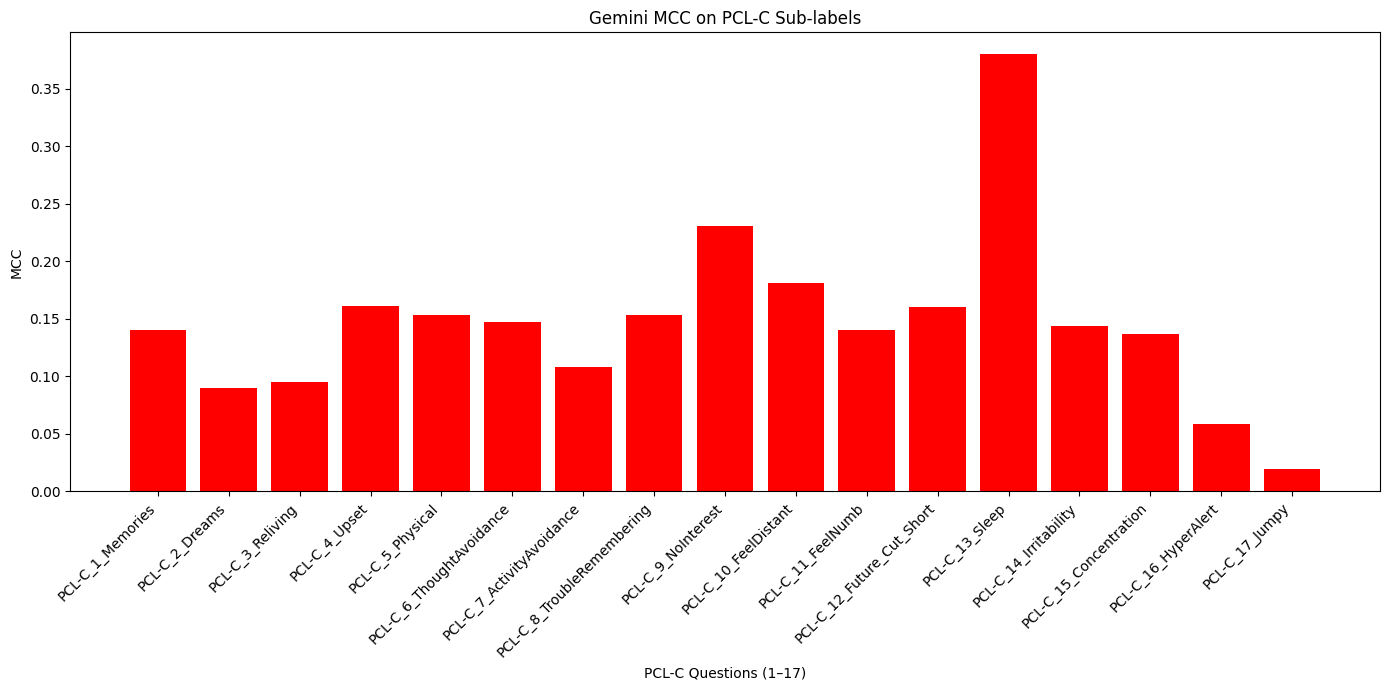

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
claude_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_Gemini.xlsx")

# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
claude_data = claude_data.iloc[:, 1:-2]


# Store metrics
f1_scores = []
mcc_scores = []

# Compute F1 and MCC per question
for column in real_data.columns:
    y_true = real_data[column]
    y_pred = claude_data[column]
    
    f1 = f1_score(y_true, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_true, y_pred)
    
    f1_scores.append(f1 * 100)   # percentage
    mcc_scores.append(mcc)       # MCC stays in [-1, 1]

# Print per-question scores
for col, f1, mcc in zip(real_data.columns, f1_scores, mcc_scores):
    print(f"{col}: F1 = {f1:.2f}%, MCC = {mcc:.2f}")

# Print mean and std
print(f"\nMean F1: {np.mean(f1_scores):.2f}% | Std Dev: {np.std(f1_scores):.2f}%")
print(f"Mean MCC: {np.mean(mcc_scores):.2f} | Std Dev: {np.std(mcc_scores):.2f}")

# Plot F1 Scores
indices = np.arange(len(real_data.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, f1_scores, color="red")
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('F1 Score (%)')
plt.title('Gemini F1 Score on PCL-C Sub-labels')
plt.xticks(indices, real_data.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot MCC Scores
plt.figure(figsize=(14, 7))
plt.bar(indices, mcc_scores, color="red")
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('MCC')
plt.title('Gemini MCC on PCL-C Sub-labels')
plt.xticks(indices, real_data.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()


PCL-C_1_Memories: F1 = 62.80%, MCC = 0.26
PCL-C_2_Dreams: F1 = 70.64%, MCC = 0.28
PCL-C_3_Reliving: F1 = 67.08%, MCC = 0.22
PCL-C_4_Upset: F1 = 62.28%, MCC = 0.28
PCL-C_5_Physical: F1 = 67.80%, MCC = 0.26
PCL-C_6_ThoughtAvoidance: F1 = 62.34%, MCC = 0.24
PCL-C_7_ActivityAvoidance: F1 = 65.07%, MCC = 0.29
PCL-C_8_TroubleRemembering: F1 = 68.73%, MCC = 0.25
PCL-C_9_NoInterest: F1 = 66.77%, MCC = 0.43
PCL-C_10_FeelDistant: F1 = 69.66%, MCC = 0.46
PCL-C_11_FeelNumb: F1 = 62.89%, MCC = 0.24
PCL-C_12_Future_Cut_Short: F1 = 63.38%, MCC = 0.22
PCL-C_13_Sleep: F1 = 70.76%, MCC = 0.43
PCL-C_14_Irritability: F1 = 68.27%, MCC = 0.34
PCL-C_15_Concentration: F1 = 58.46%, MCC = 0.23
PCL-C_16_HyperAlert: F1 = 58.94%, MCC = 0.13
PCL-C_17_Jumpy: F1 = 60.28%, MCC = 0.00

Mean F1: 65.07% | Std Dev: 3.87%
Mean MCC: 0.27 | Std Dev: 0.11


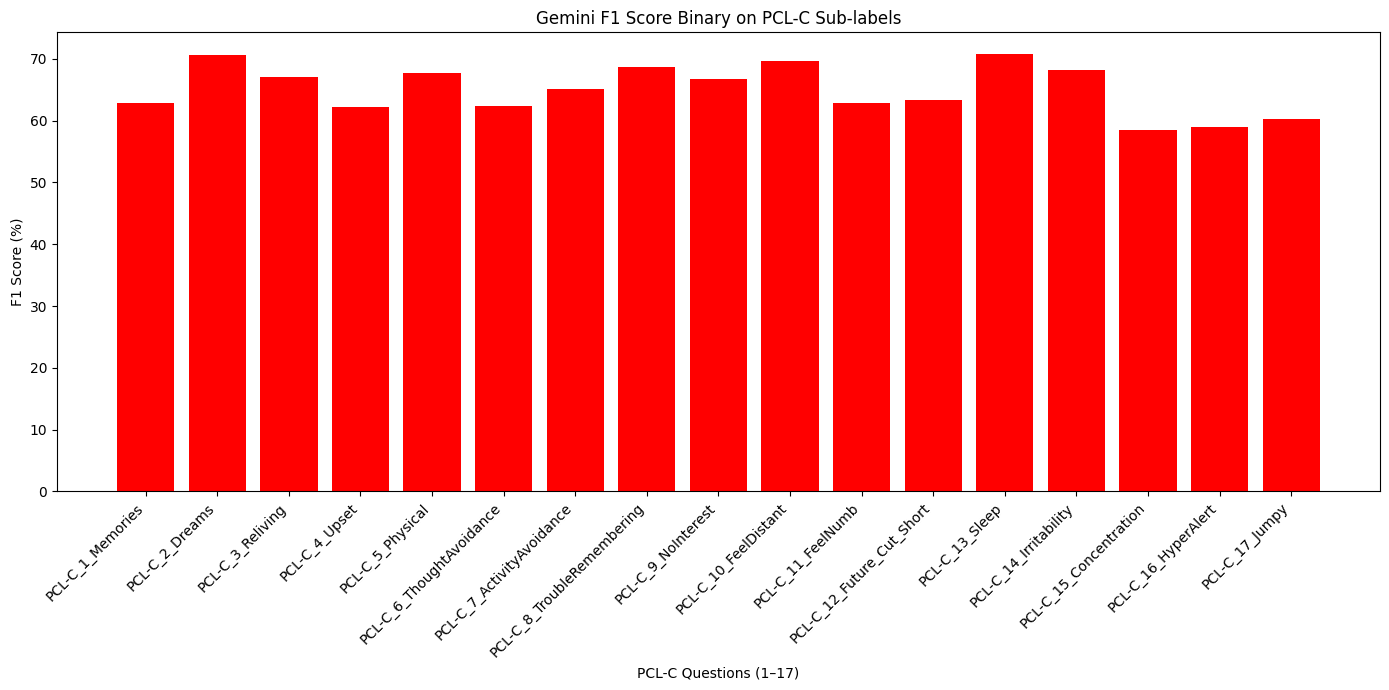

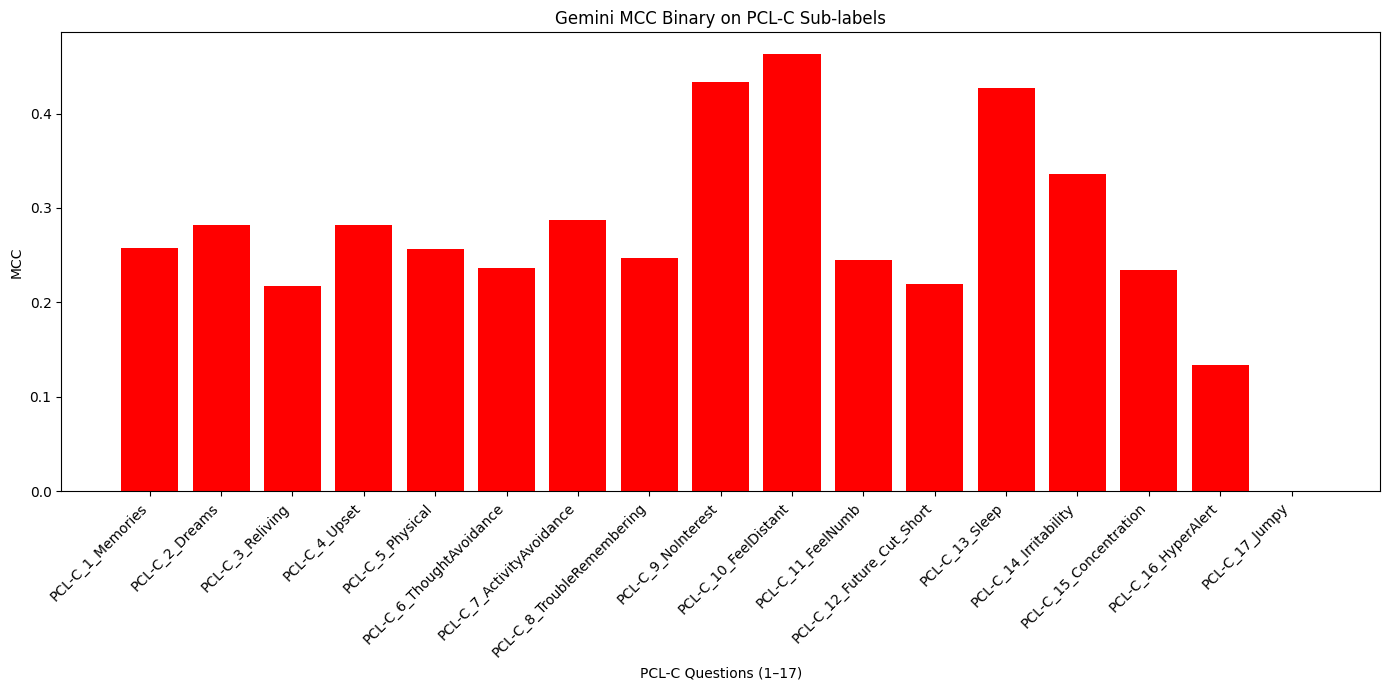

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
claude_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_Gemini.xlsx")

# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
claude_data = claude_data.iloc[:, 1:-2]

def binarize(df):
    return df.applymap(lambda x: 0 if x in [1, 2] else 1)

# Apply binarization
real_data = binarize(real_data)
claude_data = binarize(claude_data)

# Store metrics
f1_scores = []
mcc_scores = []

# Compute F1 and MCC per question
for column in real_data.columns:
    y_true = real_data[column]
    y_pred = claude_data[column]
    
    f1 = f1_score(y_true, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_true, y_pred)
    
    f1_scores.append(f1 * 100)   # percentage
    mcc_scores.append(mcc)       # MCC stays in [-1, 1]

# Print per-question scores
for col, f1, mcc in zip(real_data.columns, f1_scores, mcc_scores):
    print(f"{col}: F1 = {f1:.2f}%, MCC = {mcc:.2f}")

# Print mean and std
print(f"\nMean F1: {np.mean(f1_scores):.2f}% | Std Dev: {np.std(f1_scores):.2f}%")
print(f"Mean MCC: {np.mean(mcc_scores):.2f} | Std Dev: {np.std(mcc_scores):.2f}")

# Plot F1 Scores
indices = np.arange(len(real_data.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, f1_scores, color="red")
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('F1 Score (%)')
plt.title('Gemini F1 Score Binary on PCL-C Sub-labels')
plt.xticks(indices, real_data.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot MCC Scores
plt.figure(figsize=(14, 7))
plt.bar(indices, mcc_scores, color="red")
plt.xlabel('PCL-C Questions (1–17)')
plt.ylabel('MCC')
plt.title('Gemini MCC Binary on PCL-C Sub-labels')
plt.xticks(indices, real_data.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()


PCL-C_1_Memories: 40.00%
PCL-C_2_Dreams: 51.00%
PCL-C_3_Reliving: 48.00%
PCL-C_4_Upset: 33.00%
PCL-C_5_Physical: 55.00%
PCL-C_6_ThoughtAvoidance: 36.00%
PCL-C_7_ActivityAvoidance: 45.00%
PCL-C_8_TroubleRemembering: 59.00%
PCL-C_9_NoInterest: 46.00%
PCL-C_10_FeelDistant: 34.00%
PCL-C_11_FeelNumb: 44.00%
PCL-C_12_Future_Cut_Short: 44.00%
PCL-C_13_Sleep: 42.00%
PCL-C_14_Irritability: 37.00%
PCL-C_15_Concentration: 36.00%
PCL-C_16_HyperAlert: 39.00%
PCL-C_17_Jumpy: 47.00%

Mean GPT-4o Accuracy: 43.29%
Std Dev GPT-4o Accuracy: 7.11%


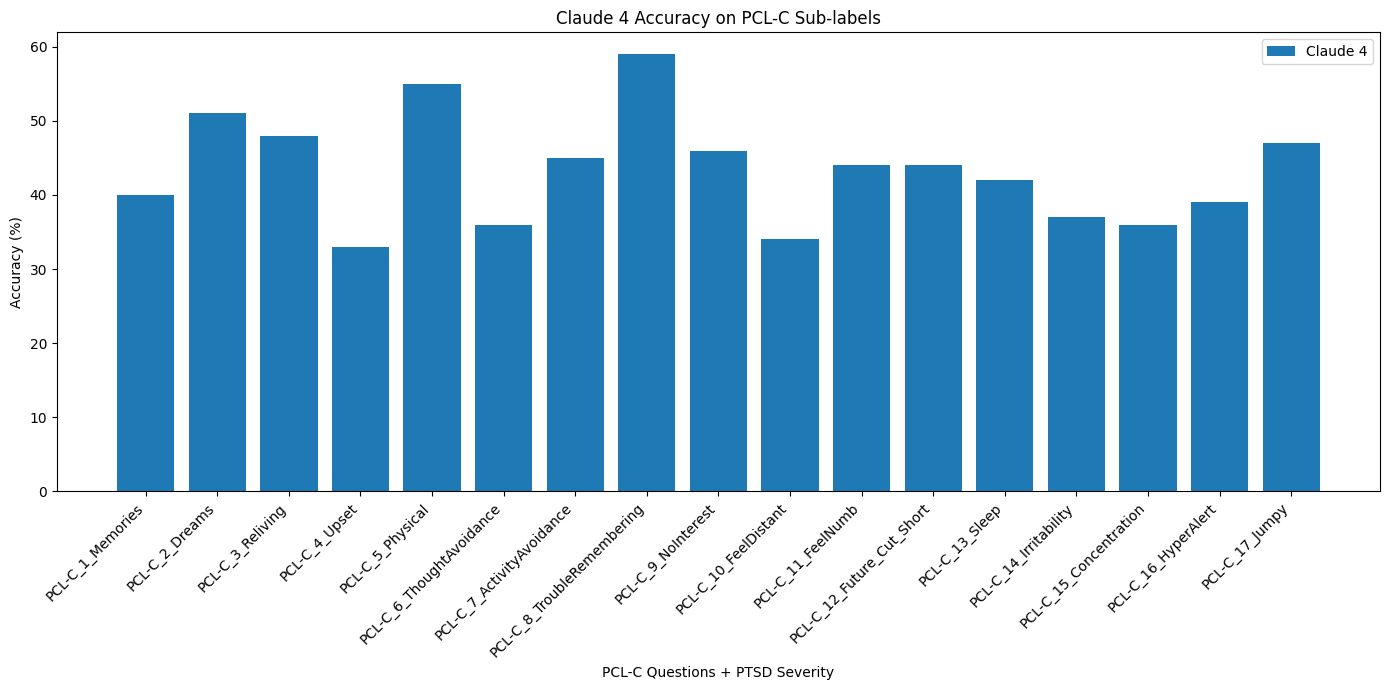

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
claude_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_Claude_4.xlsx")

# Store accuracies# Drop first column (Participant IDs) from comparison
# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
claude_data = claude_data.iloc[:, 1:-2]
claude_accuracy = []

# Compute accuracy per column (question)
for column in real_data.columns:
    total_predictions = len(real_data)
    correct_predictions = (real_data[column] == claude_data[column]).sum()
    claude_accuracy.append(correct_predictions / total_predictions * 100)

# Print per-question accuracies
for col, acc in zip(real_data.columns, gpt_4o_accuracy):
    print(f"{col}: {acc:.2f}%")

# Print mean and std
print(f"\nMean GPT-4o Accuracy: {np.mean(claude_accuracy):.2f}%")
print(f"Std Dev GPT-4o Accuracy: {np.std(claude_accuracy):.2f}%")

# Plot
indices = np.arange(len(real_data.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, claude_accuracy, color='#1f79b4', label='Claude 4')
plt.xlabel('PCL-C Questions + PTSD Severity')
plt.ylabel('Accuracy (%)')
plt.title('Claude 4 Accuracy on PCL-C Sub-labels')
plt.xticks(indices, real_data.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


PCL-C_1_Memories: 40.00%
PCL-C_2_Dreams: 51.00%
PCL-C_3_Reliving: 48.00%
PCL-C_4_Upset: 33.00%
PCL-C_5_Physical: 55.00%
PCL-C_6_ThoughtAvoidance: 36.00%
PCL-C_7_ActivityAvoidance: 45.00%
PCL-C_8_TroubleRemembering: 59.00%
PCL-C_9_NoInterest: 46.00%
PCL-C_10_FeelDistant: 34.00%
PCL-C_11_FeelNumb: 44.00%
PCL-C_12_Future_Cut_Short: 44.00%
PCL-C_13_Sleep: 42.00%
PCL-C_14_Irritability: 37.00%
PCL-C_15_Concentration: 36.00%
PCL-C_16_HyperAlert: 39.00%
PCL-C_17_Jumpy: 47.00%

Mean GPT-4o Accuracy: 70.47%
Std Dev GPT-4o Accuracy: 4.45%


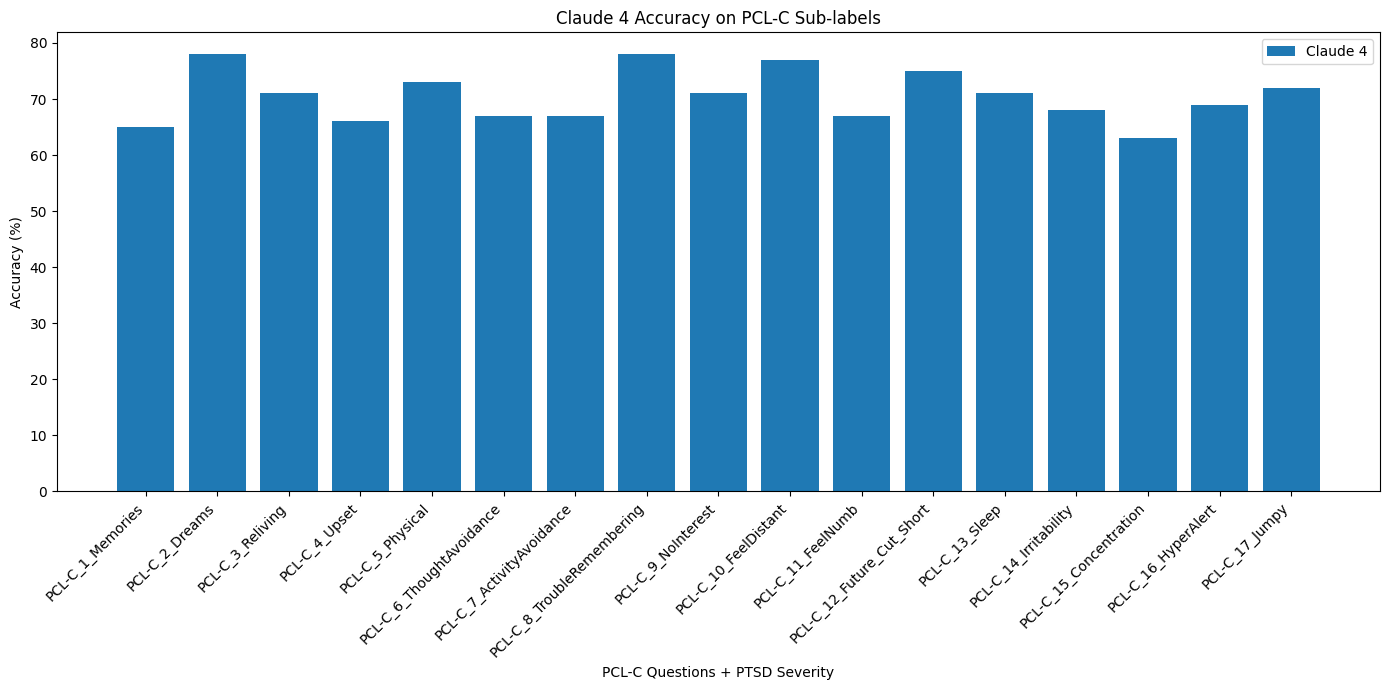

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
real_data = pd.read_csv(r"C:\Users\Christian Kevin\Downloads\PCL-C Labels.csv")
claude_data = pd.read_excel(r"C:\Users\Christian Kevin\Downloads\PCL_C_Claude_4.xlsx")

# Store accuracies# Drop first column (Participant IDs) from comparison
# Drop first (Participant ID) and last (PTSD_severity) columns
real_data = real_data.iloc[:, 1:-2]
claude_data = claude_data.iloc[:, 1:-2]
claude_accuracy = []

# Function to binarize responses
def binarize(df):
    return df.applymap(lambda x: 0 if x in [1, 2] else 1)

# Apply binarization
real_data = binarize(real_data)
claude_data = binarize(claude_data)

# Compute accuracy per column (question)
for column in real_data.columns:
    total_predictions = len(real_data)
    correct_predictions = (real_data[column] == claude_data[column]).sum()
    claude_accuracy.append(correct_predictions / total_predictions * 100)

# Print per-question accuracies
for col, acc in zip(real_data.columns, gpt_4o_accuracy):
    print(f"{col}: {acc:.2f}%")

# Print mean and std
print(f"\nMean GPT-4o Accuracy: {np.mean(claude_accuracy):.2f}%")
print(f"Std Dev GPT-4o Accuracy: {np.std(claude_accuracy):.2f}%")

# Plot
indices = np.arange(len(real_data.columns))
plt.figure(figsize=(14, 7))
plt.bar(indices, claude_accuracy, color='#1f79b4', label='Claude 4')
plt.xlabel('PCL-C Questions + PTSD Severity')
plt.ylabel('Accuracy (%)')
plt.title('Claude 4 Accuracy on PCL-C Sub-labels')
plt.xticks(indices, real_data.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


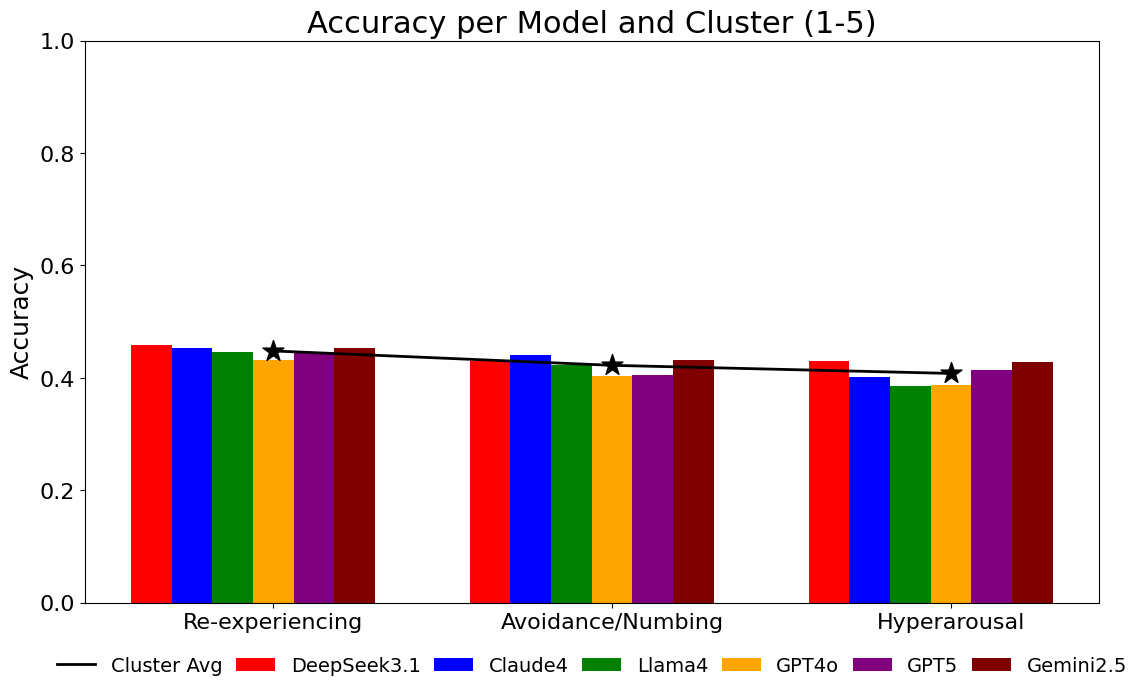

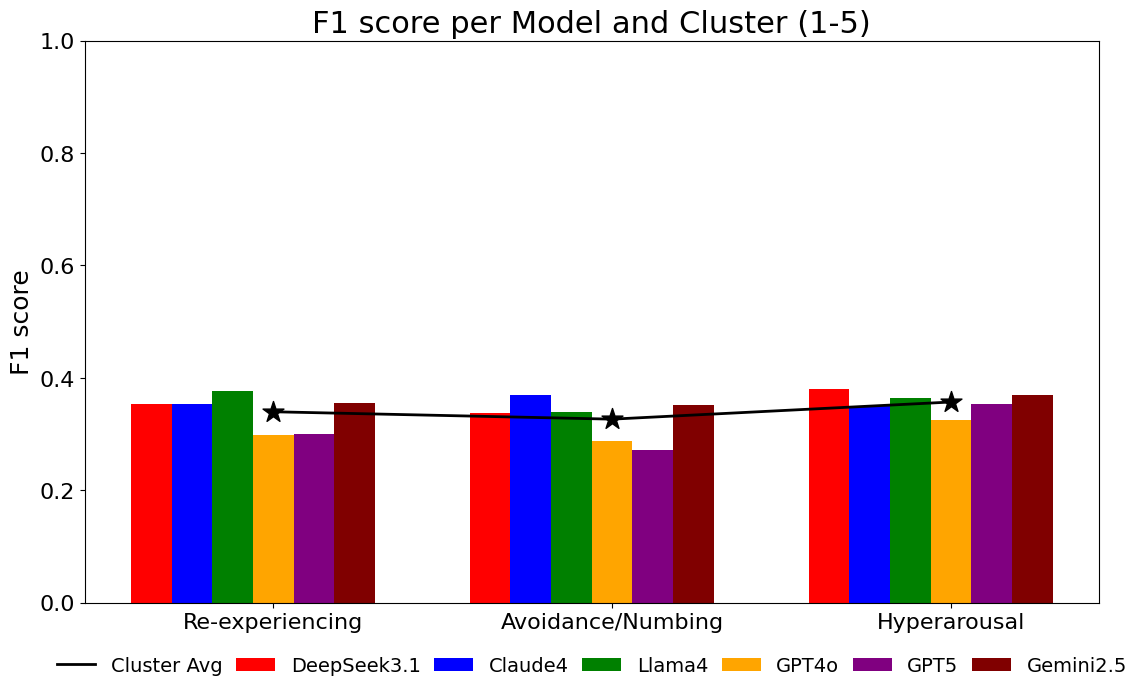

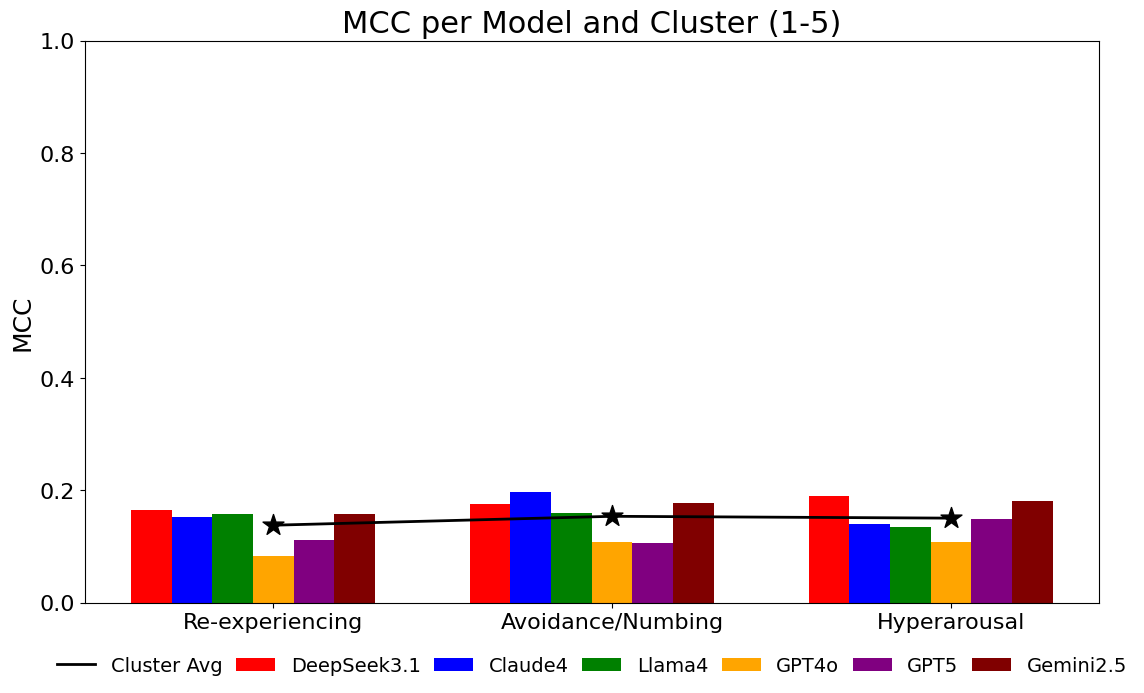

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import os

# === File paths ===
base = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels"

label_file = f"{base}\\PCL_C_Labels.csv"   # <-- change if xlsx
models = {
    "Claude4": f"{base}\\PCL_C_Claude_4.csv",
    "DeepSeek3.1": f"{base}\\PCL_C_DeepSeek.csv",
    "Gemini2.5": f"{base}\\PCL_C_Gemini.xlsx",
    "GPT4o": f"{base}\\PCL_C_GPT4o.csv",
    "GPT5": f"{base}\\PCL_C_GPT5.csv",
    "Llama4": f"{base}\\PCL_C_Llama4.csv"
}

# === helper to read CSV or Excel automatically ===
def load_file(path):
    ext = os.path.splitext(path)[1].lower()
    if ext == ".csv":
        return pd.read_csv(path)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(path)
    else:
        raise ValueError(f"Unsupported file type: {ext}")

# === Load ground truth ===
labels = load_file(label_file)
labels = labels.iloc[:, 1:-1]   # drop ID + PTSD severity if last col

# Cluster definitions (0-based indexing)
clusters = {
    "Re-experiencing": list(range(0, 5)),     # cols 1-5
    "Avoidance/Numbing": list(range(5, 12)),  # cols 6-12
    "Hyperarousal": list(range(12, 17))       # cols 13-17
}

# === Metrics function ===
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 score": f1_score(y_true, y_pred, average="weighted"),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }

# === Collect results ===
results = {metric: {cluster: [] for cluster in clusters} for metric in ["Accuracy", "F1 score", "MCC"]}

for model_name, path in models.items():
    preds = load_file(path)
    preds = preds.iloc[:, 1:-1]  # drop ID + PTSD severity if last col

    for cluster_name, cols in clusters.items():
        y_true = labels.iloc[:, cols].to_numpy().flatten()
        y_pred = preds.iloc[:, cols].to_numpy().flatten()
        metrics = compute_metrics(y_true, y_pred)
        for metric in results:
            results[metric][cluster_name].append(metrics[metric])

# === Plotting ===
model_order = [
    ("DeepSeek3.1", "red"),
    ("Claude4", "blue"),
    ("Llama4", "green"),
    ("GPT4o", "orange"),   # tangerine ≈ orange
    ("GPT5", "purple"),
    ("Gemini2.5", "maroon")   # burgundy ≈ maroon
]

for metric in results:
    plt.figure(figsize=(12, 7))
    cluster_names = list(clusters.keys())
    x = np.arange(len(cluster_names))
    width = 0.12

    # Plot bars in desired order with custom colors
    for i, (model_name, color) in enumerate(model_order):
        vals = [results[metric][cl][list(models.keys()).index(model_name)] 
                for cl in cluster_names]
        plt.bar(x + i*width, vals, width, label=model_name, color=color)

    # Add cluster averages as black stars
    cluster_avgs = []
    for j, cluster_name in enumerate(cluster_names):
        cluster_vals = results[metric][cluster_name]
        cluster_avg = np.mean(cluster_vals)
        cluster_avgs.append(cluster_avg)
        plt.scatter(j + width*(len(model_order)/2), cluster_avg,
                    color="black", marker="*", s=250, zorder=5)

    # Connect the stars with a line
    plt.plot(x + width*(len(model_order)/2), cluster_avgs,
             color="black", linestyle="-", linewidth=2, label="Cluster Avg")

    plt.ylabel(metric, fontsize=18)
    plt.title(f"{metric} per Model and Cluster (1-5)", fontsize=22)
    plt.xticks(x + width*(len(model_order)/2), cluster_names, fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0, 1)
    plt.legend(
        fontsize=14,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.16),   # shift down closer to x-axis
        ncol=len(model_order)+1,          # all in one row
        frameon=False, 
        columnspacing=0.7
    )
    plt.tight_layout()
    plt.show()


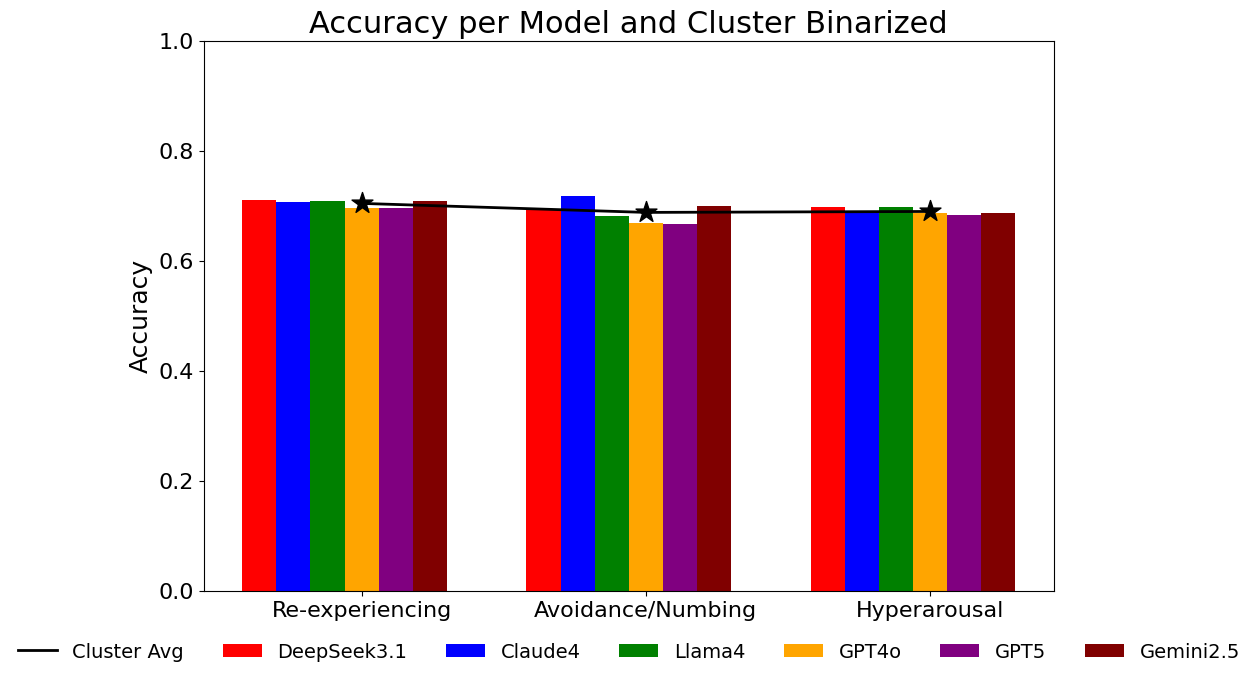

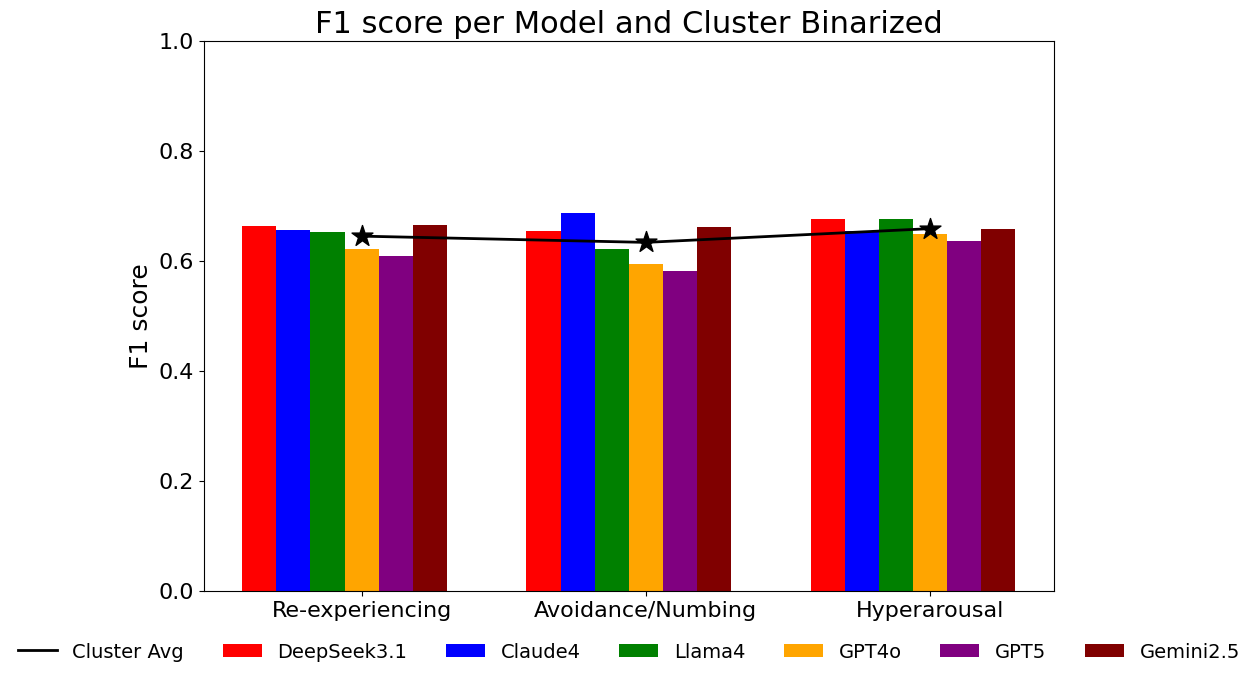

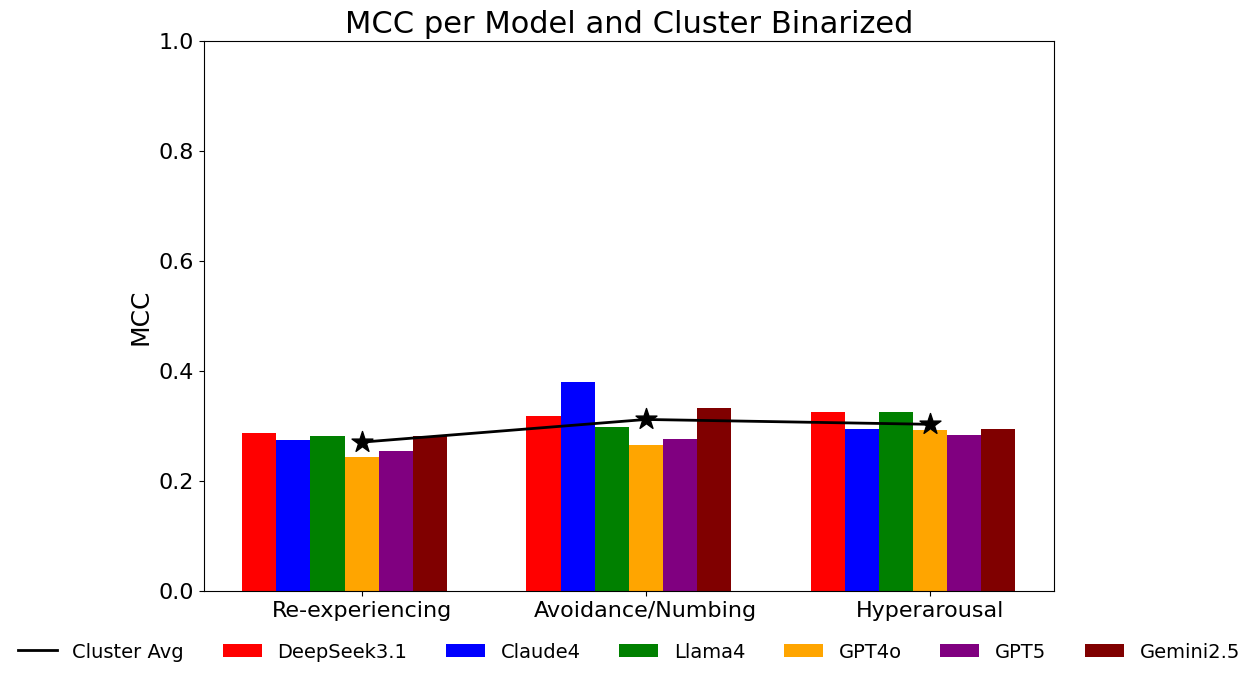

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import os

# === File paths ===
base = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels"

def binarize(df):
    # Convert Likert scale [1–5] → binary [0,1]
    return df.applymap(lambda x: 0 if x in [1, 2] else 1)

label_file = f"{base}\\PCL_C_Labels.csv"   # <-- change if xlsx
models = {
    "Claude4": f"{base}\\PCL_C_Claude_4.csv",
    "DeepSeek3.1": f"{base}\\PCL_C_DeepSeek.csv",
    "Gemini2.5": f"{base}\\PCL_C_Gemini.xlsx",
    "GPT4o": f"{base}\\PCL_C_GPT4o.csv",
    "GPT5": f"{base}\\PCL_C_GPT5.csv",
    "Llama4": f"{base}\\PCL_C_Llama4.csv"
}

# === helper to read CSV or Excel automatically ===
def load_file(path):
    ext = os.path.splitext(path)[1].lower()
    if ext == ".csv":
        return pd.read_csv(path)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(path)
    else:
        raise ValueError(f"Unsupported file type: {ext}")

# === Load & binarize ground truth ===
labels = load_file(label_file)
labels = labels.iloc[:, 1:-1]   # drop ID + PTSD severity if last col
labels = binarize(labels)

# Cluster definitions (0-based indexing)
clusters = {
    "Re-experiencing": list(range(0, 5)),     # cols 1-5
    "Avoidance/Numbing": list(range(5, 12)),  # cols 6-12
    "Hyperarousal": list(range(12, 17))       # cols 13-17
}

# === Metrics function ===
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 score": f1_score(y_true, y_pred, average="weighted"),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }

# === Collect results ===
results = {metric: {cluster: [] for cluster in clusters} for metric in ["Accuracy", "F1 score", "MCC"]}

for model_name, path in models.items():
    preds = load_file(path)
    preds = preds.iloc[:, 1:-1]  # drop ID + PTSD severity if last col
    preds = binarize(preds)      # ✅ binarize predictions too

    for cluster_name, cols in clusters.items():
        y_true = labels.iloc[:, cols].to_numpy().flatten()
        y_pred = preds.iloc[:, cols].to_numpy().flatten()
        metrics = compute_metrics(y_true, y_pred)
        for metric in results:
            results[metric][cluster_name].append(metrics[metric])
# === Plotting ===
plt.rcParams.update({
    "font.size": 14,       # base font size
    "axes.titlesize": 20,  # title
    "axes.labelsize": 16,  # x/y labels
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14
})

model_order = [
    ("DeepSeek3.1", "red"),
    ("Claude4", "blue"),
    ("Llama4", "green"),
    ("GPT4o", "orange"),   # tangerine ≈ orange
    ("GPT5", "purple"),
    ("Gemini2.5", "maroon")   # burgundy ≈ maroon
]

for metric in results:
    plt.figure(figsize=(12, 7))
    cluster_names = list(clusters.keys())
    x = np.arange(len(cluster_names))
    width = 0.12

    # Plot bars in desired order with custom colors
    for i, (model_name, color) in enumerate(model_order):
        vals = [results[metric][cl][list(models.keys()).index(model_name)] 
                for cl in cluster_names]
        plt.bar(x + i*width, vals, width, label=model_name, color=color)

    # Add cluster averages as black stars
    cluster_avgs = []
    for j, cluster_name in enumerate(cluster_names):
        cluster_vals = results[metric][cluster_name]
        cluster_avg = np.mean(cluster_vals)
        cluster_avgs.append(cluster_avg)
        plt.scatter(j + width*(len(model_order)/2), cluster_avg,
                    color="black", marker="*", s=250, zorder=5)

    # Connect the stars with a line
    plt.plot(x + width*(len(model_order)/2), cluster_avgs,
             color="black", linestyle="-", linewidth=2, label="Cluster Avg")

    plt.ylabel(metric, fontsize=18)
    plt.title(f"{metric} per Model and Cluster Binarized", fontsize=22)
    plt.xticks(x + width*(len(model_order)/2), cluster_names, fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0, 1)
    plt.legend(
        fontsize=14,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.16),   # shift down closer to x-axis
        ncol=len(model_order) +1,          # all in one row
        frameon=False
    )
    plt.tight_layout()
    plt.show()


In [11]:
from sklearn.metrics import precision_score, recall_score
from sklearn.utils import resample

# === Metrics function with bootstrapped uncertainty ===
def compute_metrics(y_true, y_pred, n_boot=1000):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1": f1_score(y_true, y_pred, average="weighted", zero_division=0),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }

    # Bootstrapping for uncertainties
    rng = np.random.default_rng(42)
    boot = {k: [] for k in metrics}
    n = len(y_true)

    for _ in range(n_boot):
        idx = rng.choice(n, size=n, replace=True)
        yt, yp = y_true[idx], y_pred[idx]
        boot["Accuracy"].append(accuracy_score(yt, yp))
        boot["Precision"].append(precision_score(yt, yp, average="weighted", zero_division=0))
        boot["Recall"].append(recall_score(yt, yp, average="weighted", zero_division=0))
        boot["F1"].append(f1_score(yt, yp, average="weighted", zero_division=0))
        boot["MCC"].append(matthews_corrcoef(yt, yp))

    # Convert to ± uncertainty (std dev)
    metrics_unc = {k: np.std(v) for k, v in boot.items()}

    return metrics, metrics_unc

# === Collect results ===
results = {metric: {cluster: [] for cluster in clusters} 
           for metric in ["Accuracy", "Precision", "Recall", "F1", "MCC"]}
uncertainties = {metric: {cluster: [] for cluster in clusters} 
                 for metric in ["Accuracy", "Precision", "Recall", "F1", "MCC"]}

for model_name, path in models.items():
    preds = load_file(path)
    preds = preds.iloc[:, 1:-1]  
    preds = binarize(preds)      

    for cluster_name, cols in clusters.items():
        y_true = labels.iloc[:, cols].to_numpy().flatten()
        y_pred = preds.iloc[:, cols].to_numpy().flatten()
        metrics, metrics_unc = compute_metrics(y_true, y_pred)
        for metric in results:
            results[metric][cluster_name].append(metrics[metric])
            uncertainties[metric][cluster_name].append(metrics_unc[metric])

# === Print results with uncertainties ===
for model_name in models.keys():
    print(f"\n=== {model_name} ===")
    for cluster_name in clusters.keys():
        print(f"  Cluster: {cluster_name}")
        for metric in results:
            val = results[metric][cluster_name][list(models.keys()).index(model_name)]
            unc = uncertainties[metric][cluster_name][list(models.keys()).index(model_name)]
            print(f"    {metric}: {val:.3f} ± {unc:.3f}")



=== Claude4 ===
  Cluster: Re-experiencing
    Accuracy: 0.706 ± 0.021
    Precision: 0.703 ± 0.025
    Recall: 0.706 ± 0.021
    F1: 0.656 ± 0.026
    MCC: 0.274 ± 0.045
  Cluster: Avoidance/Numbing
    Accuracy: 0.717 ± 0.017
    Precision: 0.731 ± 0.018
    Recall: 0.717 ± 0.017
    F1: 0.687 ± 0.020
    MCC: 0.380 ± 0.035
  Cluster: Hyperarousal
    Accuracy: 0.686 ± 0.021
    Precision: 0.683 ± 0.024
    Recall: 0.686 ± 0.021
    F1: 0.655 ± 0.025
    MCC: 0.293 ± 0.045

=== DeepSeek3.1 ===
  Cluster: Re-experiencing
    Accuracy: 0.710 ± 0.020
    Precision: 0.707 ± 0.024
    Recall: 0.710 ± 0.020
    F1: 0.664 ± 0.025
    MCC: 0.287 ± 0.044
  Cluster: Avoidance/Numbing
    Accuracy: 0.693 ± 0.018
    Precision: 0.703 ± 0.020
    Recall: 0.693 ± 0.018
    F1: 0.655 ± 0.021
    MCC: 0.317 ± 0.037
  Cluster: Hyperarousal
    Accuracy: 0.698 ± 0.021
    Precision: 0.693 ± 0.022
    Recall: 0.698 ± 0.021
    F1: 0.676 ± 0.023
    MCC: 0.326 ± 0.044

=== Gemini2.5 ===
  Cluster: Re-e

In [11]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score

# === File paths ===
base = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels"

def binarize(df):
    # Convert Likert scale [1–5] → binary [0,1]
    return df.applymap(lambda x: 0 if x in [1, 2] else 1)

label_file = f"{base}\\PCL_C_Labels.csv"   # <-- change if xlsx
models = {
    "Claude4": f"{base}\\PCL_C_Claude_4.csv",
    "DeepSeek": f"{base}\\PCL_C_DeepSeek.csv",
    "Gemini": f"{base}\\PCL_C_Gemini.xlsx",
    "GPT4o": f"{base}\\PCL_C_GPT4o.csv",
    "GPT5": f"{base}\\PCL_C_GPT5.csv",
    "Llama4": f"{base}\\PCL_C_Llama4.csv"
}

# === helper to read CSV or Excel automatically ===
def load_file(path):
    ext = os.path.splitext(path)[1].lower()
    if ext == ".csv":
        return pd.read_csv(path)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(path)
    else:
        raise ValueError(f"Unsupported file type: {ext}")

# === Load & binarize ground truth ===
labels = load_file(label_file)
labels = labels.iloc[:, 1:-1]   # drop ID + PTSD severity if last col
labels = binarize(labels)

# === Metrics function ===
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1 score": f1_score(y_true, y_pred, average="weighted", zero_division=0),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }

# === Collect results into a dataframe ===
rows = []

for model_name, path in models.items():
    preds = load_file(path)
    preds = preds.iloc[:, 1:-1]  # drop ID + PTSD severity if last col
    preds = binarize(preds)      

    for col in range(labels.shape[1]):
        y_true = labels.iloc[:, col].to_numpy()
        y_pred = preds.iloc[:, col].to_numpy()
        metrics = compute_metrics(y_true, y_pred)

        row = {"Model": model_name, "Column": col+1}
        row.update(metrics)
        rows.append(row)

# Convert to DataFrame
results_df = pd.DataFrame(rows)

# === Save to CSV ===
output_path = os.path.join(base, "PerColumn_Metrics.csv")
results_df.to_csv(output_path, index=False)

print(f"✅ Results saved to {output_path}")


c:\Users\Christian Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Christian Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Christian Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Christian Kevin\AppData\Local\Programs\Python\Python310\lib\site

✅ Results saved to C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PerColumn_Metrics.csv


c:\Users\Christian Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Christian Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [13]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score

# === File paths ===
base = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels"


label_file = f"{base}\\PCL_C_Labels.csv"   # <-- change if xlsx
models = {
    "Claude4": f"{base}\\PCL_C_Claude_4.csv",
    "DeepSeek": f"{base}\\PCL_C_DeepSeek.csv",
    "Gemini": f"{base}\\PCL_C_Gemini.xlsx",
    "GPT4o": f"{base}\\PCL_C_GPT4o.csv",
    "GPT5": f"{base}\\PCL_C_GPT5.csv",
    "Llama4": f"{base}\\PCL_C_Llama4.csv"
}

# === helper to read CSV or Excel automatically ===
def load_file(path):
    ext = os.path.splitext(path)[1].lower()
    if ext == ".csv":
        return pd.read_csv(path)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(path)
    else:
        raise ValueError(f"Unsupported file type: {ext}")

# === Load & binarize ground truth ===
labels = load_file(label_file)
labels = labels.iloc[:, 1:-1]   # drop ID + PTSD severity if last col

# === Metrics function ===
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1 score": f1_score(y_true, y_pred, average="weighted", zero_division=0),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }

# === Collect results into a dataframe ===
rows = []

for model_name, path in models.items():
    preds = load_file(path)
    preds = preds.iloc[:, 1:-1]  # drop ID + PTSD severity if last col
     

    for col in range(labels.shape[1]):
        y_true = labels.iloc[:, col].to_numpy()
        y_pred = preds.iloc[:, col].to_numpy()
        metrics = compute_metrics(y_true, y_pred)

        row = {"Model": model_name, "Column": col+1}
        row.update(metrics)
        rows.append(row)

# Convert to DataFrame
results_df = pd.DataFrame(rows)

# === Save to CSV ===
output_path = os.path.join(base, "1-5PerColumn_Metrics.csv")
results_df.to_csv(output_path, index=False)

print(f"✅ Results saved to {output_path}")


✅ Results saved to C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\1-5PerColumn_Metrics.csv


In [1]:
import pandas as pd
import numpy as np

# Paths (100-participant set only)
labels_path = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_Labels.csv"

# Load labels (keep Participant ID and PTSD total)
labels_df = pd.read_csv(labels_path)
item_cols = [c for c in labels_df.columns if c.startswith("PCL-C_")]  # 17 items

# Participant-level total and threshold
totals = labels_df[item_cols].sum(axis=1)
ptsd_positive = (totals >= 35)

pct_ptsd_pos = 100 * ptsd_positive.mean()
pct_ptsd_neg = 100 * (~ptsd_positive).mean()

# Item-level percentage with score >= 3
item_ge3_pct = (labels_df[item_cols] >= 3).mean().mul(100).rename("% >=3")
overall_item_ge3_pct = (labels_df[item_cols] >= 3).values.mean() * 100

# Summary tables
ptsd_threshold_tbl = pd.DataFrame({
    "Metric": ["% participants total >=35", "% participants total <35"],
    "Percent": [pct_ptsd_pos, pct_ptsd_neg]
})

item_level_tbl = item_ge3_pct.reset_index().rename(columns={"index": "Item"})

print("PTSD threshold (100 participants):")
print(ptsd_threshold_tbl.to_string(index=False, formatters={"Percent": "{:0.2f}".format}))
print("\nItem-level % with score >=3 (100 participants):")
print(item_level_tbl.to_string(index=False, formatters={"% >=3": "{:0.2f}".format}))
print(f"\nOverall item-level % with score >=3: {overall_item_ge3_pct:0.2f}%")


PTSD threshold (100 participants):
                   Metric Percent
% participants total >=35   52.00
 % participants total <35   48.00

Item-level % with score >=3 (100 participants):
                      Item % >=3
          PCL-C_1_Memories 42.00
            PCL-C_2_Dreams 26.00
          PCL-C_3_Reliving 29.00
             PCL-C_4_Upset 44.00
          PCL-C_5_Physical 29.00
  PCL-C_6_ThoughtAvoidance 42.00
 PCL-C_7_ActivityAvoidance 37.00
PCL-C_8_TroubleRemembering 25.00
        PCL-C_9_NoInterest 45.00
      PCL-C_10_FeelDistant 50.00
         PCL-C_11_FeelNumb 35.00
 PCL-C_12_Future_Cut_Short 34.00
            PCL-C_13_Sleep 50.00
     PCL-C_14_Irritability 38.00
    PCL-C_15_Concentration 40.00
       PCL-C_16_HyperAlert 34.00
            PCL-C_17_Jumpy 28.00

Overall item-level % with score >=3: 36.94%


In [3]:
import pandas as pd
import os

# Build per-participant transcript lengths (Participant-only words)
raw_transcripts_path = r"C:\Users\Christian Kevin\PycharmProjects\scriptunify\Transcript_100_Normal.csv"
lengths_out_path = r"C:\Users\Christian Kevin\PycharmProjects\scriptunify\Transcript_100_Lengths.csv"

if not os.path.exists(raw_transcripts_path):
    raise FileNotFoundError(raw_transcripts_path)

raw = pd.read_csv(raw_transcripts_path)
if not {"Participant_ID", "Transcript"}.issubset(raw.columns):
    raise ValueError("Transcript CSV must have columns: Participant_ID, Transcript")

# Extract only participant utterances per row and count words
# Expected format: Transcript lines begin with a speaker label like 'Participant\t...' or 'Ellie\t...'
parts = []
for _, row in raw.iterrows():
    line = str(row["Transcript"]) if pd.notna(row["Transcript"]) else ""
    # keep only Participant lines; remove the leading label
    if line.startswith("Participant\t") or line.startswith("Participant, ") or line.startswith("Participant "):
        # split once on tab if present; otherwise remove the label token
        if "\t" in line:
            content = line.split("\t", 1)[1]
        else:
            toks = line.split(None, 1)
            content = toks[1] if len(toks) > 1 else ""
    else:
        content = ""
    parts.append({
        "Participant": row["Participant_ID"],
        "participant_text": content
    })

parts_df = pd.DataFrame(parts)
agg = parts_df.groupby("Participant", as_index=False)["participant_text"].apply(lambda s: " \n".join(s)).rename(columns={"participant_text": "text"})
agg["transcript_length"] = agg["text"].str.split().str.len().fillna(0).astype(int)

agg[["Participant", "transcript_length"]].to_csv(lengths_out_path, index=False)
print(f"Saved transcript lengths to: {lengths_out_path}")


Saved transcript lengths to: C:\Users\Christian Kevin\PycharmProjects\scriptunify\Transcript_100_Lengths.csv


In [5]:
import os
from scipy.stats import pearsonr, spearmanr

# Correlation between transcript length and per-participant model accuracy (100 participants only)
# Provide a CSV with columns: Participant, transcript_length
transcript_lengths_path = r"C:\Users\Christian Kevin\PycharmProjects\scriptunify\Transcript_100_Lengths.csv"

# Choose model file to evaluate (from the 100-participant set)
# Options seen in notebook directory:
#   C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_GPT4o.csv
#   C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_Claude_4.csv
#   C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_GPT5.csv
#   C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_Llama4.csv
model_path = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_GPT4o.csv"

# How to score performance: "binarized" (1-2 -> 0, 3-5 -> 1) or "likert" (exact match)
score_mode = "binarized"  # or "likert"

labels = pd.read_csv(labels_path)
model_df = pd.read_csv(model_path)

# Align to the 17 item columns only
item_cols = [c for c in labels.columns if c.startswith("PCL-C_")]
labels_items = labels[["Participant"] + item_cols].copy()
model_items = model_df[["Participant"] + item_cols].copy()

# Optional binarization
if score_mode == "binarized":
    labels_items[item_cols] = labels_items[item_cols].applymap(lambda x: 0 if x in [1, 2] else 1)
    model_items[item_cols] = model_items[item_cols].applymap(lambda x: 0 if x in [1, 2] else 1)

# Merge to ensure matching participants
merged = pd.merge(labels_items, model_items, on="Participant", suffixes=("_true", "_pred"))

# Compute per-participant accuracy across the 17 items
true_cols = [f"{c}_true" for c in item_cols]
pred_cols = [f"{c}_pred" for c in item_cols]
acc_per_participant = (merged[true_cols].to_numpy() == merged[pred_cols].to_numpy()).mean(axis=1)

# Read transcript lengths
if not transcript_lengths_path or not os.path.exists(transcript_lengths_path):
    print("Please set 'transcript_lengths_path' to a CSV with columns: Participant, transcript_length")
else:
    tlen = pd.read_csv(transcript_lengths_path)
    if not {"Participant", "transcript_length"}.issubset(tlen.columns):
        raise ValueError("Transcript lengths file must contain 'Participant' and 'transcript_length' columns")
    merged2 = pd.merge(merged[["Participant"]].copy(), tlen[["Participant", "transcript_length"]], on="Participant", how="inner")
    if len(merged2) != len(acc_per_participant):
        # Align to participants intersection
        acc_df = pd.DataFrame({
            "Participant": merged["Participant"],
            "accuracy": acc_per_participant
        })
        acc_df = pd.merge(acc_df, merged2, on="Participant", how="inner")
        x = acc_df["transcript_length"].to_numpy()
        y = acc_df["accuracy"].to_numpy()
    else:
        x = merged2["transcript_length"].to_numpy()
        y = acc_per_participant

    pearson_r, pearson_p = pearsonr(x, y)
    spearman_rho, spearman_p = spearmanr(x, y)

    print(f"Model: {os.path.basename(model_path)} | Scoring: {score_mode}")
    print(f"Pearson r = {pearson_r:0.3f}, p = {pearson_p:0.4f}")
    print(f"Spearman rho = {spearman_rho:0.3f}, p = {spearman_p:0.4f}")
    if pearson_p < 0.05 or spearman_p < 0.05:
        print("Statistically significant at p < .05 (at least one test)")
    else:
        print("Not statistically significant at p < .05")


Model: PCL_C_GPT4o.csv | Scoring: binarized
Pearson r = 0.011, p = 0.9169
Spearman rho = -0.001, p = 0.9899
Not statistically significant at p < .05


C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\838814742.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels_items[item_cols] = labels_items[item_cols].applymap(lambda x: 0 if x in [1, 2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\838814742.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_items[item_cols] = model_items[item_cols].applymap(lambda x: 0 if x in [1, 2] else 1)


In [7]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


You should consider upgrading via the 'C:\Users\Christian Kevin\PycharmProjects\scriptunify\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr, spearmanr

# Paths
labels_path = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_Labels.csv"
lengths_path = r"C:\Users\Christian Kevin\PycharmProjects\scriptunify\Transcript_100_Lengths.csv"
models = {
    "Claude4": r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_Claude_4.csv",
    "DeepSeek3.1": r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_DeepSeek.csv",
    "Gemini2.5": r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_Gemini.xlsx",
    "GPT4o": r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_GPT4o.csv",
    "GPT5": r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_GPT5.csv",
    "Llama4": r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels\PCL_C_Llama4.csv",
}

# Helper to read csv/xlsx
def load_auto(path: str) -> pd.DataFrame:
    ext = os.path.splitext(path)[1].lower()
    if ext == ".csv":
        return pd.read_csv(path)
    elif ext in (".xls", ".xlsx"):
        return pd.read_excel(path)
    raise ValueError(f"Unsupported file type: {ext}")

# Load data
labels = pd.read_csv(labels_path)
item_cols = [c for c in labels.columns if c.startswith("PCL-C_")]
labels_items = labels[["Participant"] + item_cols].copy()
lengths = pd.read_csv(lengths_path)  # columns: Participant, transcript_length

# Scoring helpers
binarize = lambda s: s.applymap(lambda x: 0 if x in [1, 2] else 1)

def participant_accuracy(df_true: pd.DataFrame, df_pred: pd.DataFrame) -> pd.Series:
    merged = pd.merge(df_true, df_pred, on="Participant", suffixes=("_true", "_pred"))
    true_cols = [f"{c}_true" for c in item_cols]
    pred_cols = [f"{c}_pred" for c in item_cols]
    acc = (merged[true_cols].to_numpy() == merged[pred_cols].to_numpy()).mean(axis=1)
    return pd.Series(acc, index=merged["Participant"].to_numpy(), name="accuracy")

rows = []
for model_name, model_path in models.items():
    if not os.path.exists(model_path):
        print(f"Skipping {model_name}: file not found")
        continue
    preds = load_auto(model_path)
    if "Participant" not in preds.columns:
        print(f"Skipping {model_name}: no Participant column")
        continue
    model_items = preds[["Participant"] + item_cols].copy()

    # Likert exact match
    acc_likert = participant_accuracy(labels_items, model_items)
    df_l = pd.merge(acc_likert.rename("accuracy").reset_index().rename(columns={"index": "Participant"}),
                    lengths, on="Participant", how="inner")
    if len(df_l) >= 3:
        pr_l, pp_l = pearsonr(df_l["transcript_length"], df_l["accuracy"]) 
        sr_l, sp_l = spearmanr(df_l["transcript_length"], df_l["accuracy"]) 
        rows.append({"Model": model_name, "Scoring": "likert", 
                     "Pearson_r": pr_l, "Pearson_p": pp_l, 
                     "Spearman_rho": sr_l, "Spearman_p": sp_l, 
                     "N": len(df_l)})
    else:
        rows.append({"Model": model_name, "Scoring": "likert", 
                     "Pearson_r": np.nan, "Pearson_p": np.nan, 
                     "Spearman_rho": np.nan, "Spearman_p": np.nan, 
                     "N": len(df_l)})

    # Binarized (1-2 -> 0, 3-5 -> 1)
    lab_bin = labels_items.copy()
    pred_bin = model_items.copy()
    lab_bin[item_cols] = binarize(lab_bin[item_cols])
    pred_bin[item_cols] = binarize(pred_bin[item_cols])
    acc_bin = participant_accuracy(lab_bin, pred_bin)
    df_b = pd.merge(acc_bin.rename("accuracy").reset_index().rename(columns={"index": "Participant"}),
                    lengths, on="Participant", how="inner")
    if len(df_b) >= 3:
        pr_b, pp_b = pearsonr(df_b["transcript_length"], df_b["accuracy"]) 
        sr_b, sp_b = spearmanr(df_b["transcript_length"], df_b["accuracy"]) 
        rows.append({"Model": model_name, "Scoring": "binarized", 
                     "Pearson_r": pr_b, "Pearson_p": pp_b, 
                     "Spearman_rho": sr_b, "Spearman_p": sp_b, 
                     "N": len(df_b)})
    else:
        rows.append({"Model": model_name, "Scoring": "binarized", 
                     "Pearson_r": np.nan, "Pearson_p": np.nan, 
                     "Spearman_rho": np.nan, "Spearman_p": np.nan, 
                     "N": len(df_b)})

corr_df = pd.DataFrame(rows)

# Pretty print with significance columns
if not corr_df.empty:
    disp = corr_df.copy()
    disp["Pearson_sig"] = disp["Pearson_p"].apply(lambda p: (pd.notna(p) and p < 0.05))
    disp["Spearman_sig"] = disp["Spearman_p"].apply(lambda p: (pd.notna(p) and p < 0.05))
    disp["Any_sig"] = disp[["Pearson_sig", "Spearman_sig"]].any(axis=1)

    # Render values
    disp_fmt = disp.copy()
    disp_fmt["Pearson_r"] = disp_fmt["Pearson_r"].map(lambda v: f"{v:0.3f}" if pd.notna(v) else "")
    disp_fmt["Pearson_p"] = disp_fmt["Pearson_p"].map(lambda v: f"{v:0.4f}" if pd.notna(v) else "")
    disp_fmt["Spearman_rho"] = disp_fmt["Spearman_rho"].map(lambda v: f"{v:0.3f}" if pd.notna(v) else "")
    disp_fmt["Spearman_p"] = disp_fmt["Spearman_p"].map(lambda v: f"{v:0.4f}" if pd.notna(v) else "")
    disp_fmt["Pearson_sig"] = disp_fmt["Pearson_sig"].map(lambda b: "Yes" if b else "No")
    disp_fmt["Spearman_sig"] = disp_fmt["Spearman_sig"].map(lambda b: "Yes" if b else "No")
    disp_fmt["Any_sig"] = disp_fmt["Any_sig"].map(lambda b: "Yes" if b else "No")

    disp_fmt = disp_fmt[["Model", "Scoring", "N", 
                         "Pearson_r", "Pearson_p", "Pearson_sig",
                         "Spearman_rho", "Spearman_p", "Spearman_sig",
                         "Any_sig"]]
    print(disp_fmt.to_string(index=False))
else:
    print("No correlation results computed.")


C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\1544244917.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binarize = lambda s: s.applymap(lambda x: 0 if x in [1, 2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\1544244917.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binarize = lambda s: s.applymap(lambda x: 0 if x in [1, 2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\1544244917.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binarize = lambda s: s.applymap(lambda x: 0 if x in [1, 2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\1544244917.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binarize = lambda s: s.applymap(lambda x: 0 if x in [1, 2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\1544244917.py:34: FutureWarni

      Model   Scoring   N Pearson_r Pearson_p Pearson_sig Spearman_rho Spearman_p Spearman_sig Any_sig
    Claude4    likert 100     0.048    0.6369          No        0.050     0.6219           No      No
    Claude4 binarized 100     0.003    0.9778          No       -0.002     0.9833           No      No
DeepSeek3.1    likert 100     0.037    0.7130          No        0.021     0.8326           No      No
DeepSeek3.1 binarized 100     0.018    0.8614          No        0.028     0.7839           No      No
  Gemini2.5    likert 100    -0.022    0.8306          No       -0.036     0.7247           No      No
  Gemini2.5 binarized 100    -0.067    0.5056          No       -0.062     0.5373           No      No
      GPT4o    likert 100     0.014    0.8881          No        0.018     0.8558           No      No
      GPT4o binarized 100     0.011    0.9169          No       -0.001     0.9899           No      No
       GPT5    likert 100     0.049    0.6295          No        0.033   

In [19]:
import pandas as pd
import os

# Standalone SD calculator from exported per-column metrics files (no code reuse)
# Files produced previously:
#  - PerColumn_Metrics.csv (binarized)
#  - 1-5PerColumn_Metrics.csv (likert)
base = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels"
files = {
    "binarized": os.path.join(base, "PerColumn_Metrics.csv"),
    "likert": os.path.join(base, "1-5PerColumn_Metrics.csv"),
}

# Cluster boundaries (1-based columns in the CSVs)
clusters = {
    "B (Re-experiencing)": list(range(1, 6)),      # 1-5
    "C (Avoidance/Numbing)": list(range(6, 13)),   # 6-12
    "D (Hyperarousal)": list(range(13, 18)),       # 13-17
}

metrics_to_summarize = ["Accuracy", "F1 score", "MCC"]

for label, path in files.items():
    if not os.path.exists(path):
        print(f"Missing file for {label}: {path}")
        continue
    df = pd.read_csv(path)
    if not {"Model", "Column"}.issubset(df.columns):
        print(f"Unexpected format in {path}; requires columns: Model, Column, and metrics")
        continue

    print(f"\n===== Standard deviations ({label}) =====")
    # Ensure expected metrics exist
    missing_metrics = [m for m in metrics_to_summarize if m not in df.columns]
    if missing_metrics:
        print(f"Missing metrics in {path}: {missing_metrics}")
        continue

    # Compute mean and SD per model per cluster
    rows = []
    for model in sorted(df["Model"].unique()):
        sub = df[df["Model"] == model]
        for cluster_name, cols in clusters.items():
            sub_cluster = sub[sub["Column"].isin(cols)]
            if sub_cluster.empty:
                continue
            entry = {
                "Model": model,
                "Cluster": cluster_name,
            }
            for metric in metrics_to_summarize:
                entry[f"{metric}_mean"] = float(sub_cluster[metric].mean())
                entry[f"{metric}_std"] = float(sub_cluster[metric].std(ddof=1))
            rows.append(entry)
    out = pd.DataFrame(rows)

    # Pivot and print per metric (Mean and SD)
    order_cols = ["B (Re-experiencing)", "C (Avoidance/Numbing)", "D (Hyperarousal)"]
    for metric in metrics_to_summarize:
        wide_sd = out.pivot(index="Model", columns="Cluster", values=f"{metric}_std")[order_cols]
        if metric == "F1 score":
            # For F1, recompute cluster-level F1 (not mean of per-column F1)
            from sklearn.metrics import f1_score
            import numpy as np
            import os
            # Prepare labels/preds according to current file label (binarized vs likert)
            labels_path = os.path.join(base, "PCL_C_Labels.csv")
            labels_df = pd.read_csv(labels_path)
            item_cols = [c for c in labels_df.columns if c.startswith("PCL-C_")]
            labels_items = labels_df[item_cols].copy()
            # Model files
            model_files = {
                "Claude4": os.path.join(base, "PCL_C_Claude_4.csv"),
                "DeepSeek3.1": os.path.join(base, "PCL_C_DeepSeek.csv"),
                "Gemini2.5": os.path.join(base, "PCL_C_Gemini.xlsx"),
                "GPT4o": os.path.join(base, "PCL_C_GPT4o.csv"),
                "GPT5": os.path.join(base, "PCL_C_GPT5.csv"),
                "Llama4": os.path.join(base, "PCL_C_Llama4.csv"),
            }
            def load_auto(p):
                ext = os.path.splitext(p)[1].lower()
                if ext == ".csv":
                    return pd.read_csv(p)
                elif ext in (".xls", ".xlsx"):
                    return pd.read_excel(p)
                raise ValueError(f"Unsupported file type: {ext}")
            # Binarize if needed
            def binarize_df(df):
                return df.applymap(lambda x: 0 if x in [1,2] else 1)
            if label == "binarized":
                labels_items_use = binarize_df(labels_items.copy())
            else:
                labels_items_use = labels_items.copy()
            # Compute cluster F1 per model
            f1_rows = []
            for model_name, mpath in model_files.items():
                if not os.path.exists(mpath):
                    continue
                preds_full = load_auto(mpath)
                if not set(item_cols).issubset(preds_full.columns):
                    continue
                preds_items = preds_full[item_cols].copy()
                if label == "binarized":
                    preds_items = binarize_df(preds_items)
                for cl_name, cl_cols in clusters.items():
                    idx = [i-1 for i in cl_cols]  # convert 1-based to 0-based
                    y_true = labels_items_use.iloc[:, idx].to_numpy().flatten()
                    y_pred = preds_items.iloc[:, idx].to_numpy().flatten()
                    f1_val = f1_score(y_true, y_pred, average="weighted", zero_division=0)
                    f1_rows.append({"Model": model_name, "Cluster": cl_name, "F1": f1_val})
            f1_df = pd.DataFrame(f1_rows)
            if not f1_df.empty:
                f1_wide = f1_df.pivot(index="Model", columns="Cluster", values="F1")[order_cols]
                print("\nF1 score (cluster-level)")
                print(f1_wide.round(3).to_string())
        elif metric == "MCC":
            # For MCC, recompute cluster-level MCC (not mean of per-column MCC)
            from sklearn.metrics import matthews_corrcoef
            import os
            labels_path = os.path.join(base, "PCL_C_Labels.csv")
            labels_df = pd.read_csv(labels_path)
            item_cols = [c for c in labels_df.columns if c.startswith("PCL-C_")]
            labels_items = labels_df[item_cols].copy()
            model_files = {
                "Claude4": os.path.join(base, "PCL_C_Claude_4.csv"),
                "DeepSeek3.1": os.path.join(base, "PCL_C_DeepSeek.csv"),
                "Gemini2.5": os.path.join(base, "PCL_C_Gemini.xlsx"),
                "GPT4o": os.path.join(base, "PCL_C_GPT4o.csv"),
                "GPT5": os.path.join(base, "PCL_C_GPT5.csv"),
                "Llama4": os.path.join(base, "PCL_C_Llama4.csv"),
            }
            def load_auto(p):
                ext = os.path.splitext(p)[1].lower()
                if ext == ".csv":
                    return pd.read_csv(p)
                elif ext in (".xls", ".xlsx"):
                    return pd.read_excel(p)
                raise ValueError(f"Unsupported file type: {ext}")
            def binarize_df(df):
                return df.applymap(lambda x: 0 if x in [1,2] else 1)
            if label == "binarized":
                labels_items_use = binarize_df(labels_items.copy())
            else:
                labels_items_use = labels_items.copy()
            mcc_rows = []
            for model_name, mpath in model_files.items():
                if not os.path.exists(mpath):
                    continue
                preds_full = load_auto(mpath)
                if not set(item_cols).issubset(preds_full.columns):
                    continue
                preds_items = preds_full[item_cols].copy()
                if label == "binarized":
                    preds_items = binarize_df(preds_items)
                for cl_name, cl_cols in clusters.items():
                    idx = [i-1 for i in cl_cols]
                    y_true = labels_items_use.iloc[:, idx].to_numpy().flatten()
                    y_pred = preds_items.iloc[:, idx].to_numpy().flatten()
                    mcc_val = matthews_corrcoef(y_true, y_pred)
                    mcc_rows.append({"Model": model_name, "Cluster": cl_name, "MCC": mcc_val})
            mcc_df = pd.DataFrame(mcc_rows)
            if not mcc_df.empty:
                mcc_wide = mcc_df.pivot(index="Model", columns="Cluster", values="MCC")[order_cols]
                print("\nMCC (cluster-level)")
                print(mcc_wide.round(3).to_string())
        else:
            # For Accuracy, show mean from per-column metrics
            wide_mean = out.pivot(index="Model", columns="Cluster", values=f"{metric}_mean")[order_cols]
            print(f"\n{metric} Mean")
            print(wide_mean.round(3).to_string())
        print(f"\n{metric} SD")
        print(wide_sd.round(3).to_string())



===== Standard deviations (binarized) =====

Accuracy Mean
Cluster   B (Re-experiencing)  C (Avoidance/Numbing)  D (Hyperarousal)
Model                                                                 
Claude4                 0.706                  0.717             0.686
DeepSeek                0.710                  0.693             0.698
GPT4o                   0.696                  0.669             0.686
GPT5                    0.696                  0.667             0.682
Gemini                  0.708                  0.699             0.686
Llama4                  0.708                  0.681             0.698

Accuracy SD
Cluster   B (Re-experiencing)  C (Avoidance/Numbing)  D (Hyperarousal)
Model                                                                 
Claude4                 0.053                  0.049             0.035
DeepSeek                0.051                  0.037             0.065
GPT4o                   0.068                  0.053             0.042
GPT5

C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:89: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:89: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:89: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:89: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:89: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map


F1 score (cluster-level)
Cluster      B (Re-experiencing)  C (Avoidance/Numbing)  D (Hyperarousal)
Model                                                                    
Claude4                    0.656                  0.687             0.655
DeepSeek3.1                0.664                  0.655             0.676
GPT4o                      0.621                  0.594             0.649
GPT5                       0.609                  0.581             0.635
Gemini2.5                  0.665                  0.661             0.658
Llama4                     0.653                  0.621             0.676

F1 score SD
Cluster   B (Re-experiencing)  C (Avoidance/Numbing)  D (Hyperarousal)
Model                                                                 
Claude4                 0.045                  0.051             0.055
DeepSeek                0.040                  0.032             0.079
GPT4o                   0.062                  0.057             0.078
GPT5          

C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:140: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:140: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:140: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:140: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: 0 if x in [1,2] else 1)
C:\Users\Christian Kevin\AppData\Local\Temp\ipykernel_7096\792829614.py:140: FutureWarning: DataFrame.applymap has been deprecated. Use DataFram


===== Standard deviations (likert) =====

Accuracy Mean
Cluster   B (Re-experiencing)  C (Avoidance/Numbing)  D (Hyperarousal)
Model                                                                 
Claude4                 0.454                  0.440             0.402
DeepSeek                0.458                  0.430             0.430
GPT4o                   0.432                  0.404             0.388
GPT5                    0.444                  0.406             0.414
Gemini                  0.454                  0.431             0.428
Llama4                  0.446                  0.423             0.386

Accuracy SD
Cluster   B (Re-experiencing)  C (Avoidance/Numbing)  D (Hyperarousal)
Model                                                                 
Claude4                 0.088                  0.081             0.044
DeepSeek                0.088                  0.073             0.066
GPT4o                   0.120                  0.097             0.061
GPT5   

In [2]:
import pandas as pd
from sklearn.metrics import f1_score, matthews_corrcoef

# Paths
base = r"C:\Users\Christian Kevin\Downloads\PCL_C_Label\Labels"

labels_path = base + r"\PCL_C_Labels.csv"
deepseek_path = base + r"\PCL_C_DeepSeek.csv"
llama_path = base + r"\PCL_C_Llama4.csv"

# Load labels
labels = pd.read_csv(labels_path)
item_cols = [c for c in labels.columns if c.startswith("PCL-C_")]

# Hyperarousal items are 13–17 (PCL-C_13 through PCL-C_17)
# Find the actual column names for items 13-17
# Columns are typically named like "PCL-C_13_Sleep", "PCL-C_14_Irritability", etc.
hyperarousal_cols = sorted([col for col in item_cols if any(col.startswith(f"PCL-C_{i}") for i in range(13, 18))])

if len(hyperarousal_cols) != 5:
    # Fallback: use indices if column names don't match expected pattern
    # Items 13-17 are at indices 12-16 (0-based) in the item_cols list
    hyperarousal_cols = item_cols[12:17]
    print(f"Warning: Could not find 5 hyperarousal columns by name, using indices 12-16")

print(f"Using hyperarousal columns: {hyperarousal_cols}")

# Extract hyperarousal data using column names
y_true = labels[hyperarousal_cols].to_numpy().flatten()

# Load predictions - ensure we use the same columns
pred_DS_df = pd.read_csv(deepseek_path)
pred_LL_df = pd.read_csv(llama_path)

# Make sure we're using the same column names
pred_DS = pred_DS_df[hyperarousal_cols].to_numpy().flatten()
pred_LL = pred_LL_df[hyperarousal_cols].to_numpy().flatten()

# Binarize (1–2 → 0, 3–5 → 1)
def binarize(arr):
    return (arr >= 3).astype(int)

y_true = binarize(y_true)
y_DS = binarize(pred_DS)
y_LL = binarize(pred_LL)

# Confusion matrix helper
def confusion(y_t, y_p):
    TP = ((y_t == 1) & (y_p == 1)).sum()
    TN = ((y_t == 0) & (y_p == 0)).sum()
    FP = ((y_t == 0) & (y_p == 1)).sum()
    FN = ((y_t == 1) & (y_p == 0)).sum()
    return TP, TN, FP, FN

TP_DS, TN_DS, FP_DS, FN_DS = confusion(y_true, y_DS)
TP_LL, TN_LL, FP_LL, FN_LL = confusion(y_true, y_LL)

# Metrics
def acc(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

acc_DS = acc(TP_DS, TN_DS, FP_DS, FN_DS)
acc_LL = acc(TP_LL, TN_LL, FP_LL, FN_LL)

f1_DS = f1_score(y_true, y_DS, average="weighted", zero_division=0)
f1_LL = f1_score(y_true, y_LL, average="weighted", zero_division=0)

mcc_DS = matthews_corrcoef(y_true, y_DS)
mcc_LL = matthews_corrcoef(y_true, y_LL)

# Print results
print("\n===== Hyperarousal (Items 13–17) =====")

print("\n=== Confusion Matrix: DeepSeek ===")
print(f"TP: {TP_DS}, TN: {TN_DS}, FP: {FP_DS}, FN: {FN_DS}")

print("\n=== Confusion Matrix: Llama ===")
print(f"TP: {TP_LL}, TN: {TN_LL}, FP: {FP_LL}, FN: {FN_LL}")

print("\n=== Metrics ===")
print(f"Accuracy DeepSeek: {acc_DS:.4f}")
print(f"Accuracy Llama:    {acc_LL:.4f}")
print()
print(f"F1 DeepSeek: {f1_DS:.4f}")
print(f"F1 Llama:    {f1_LL:.4f}")
print()
print(f"MCC DeepSeek: {mcc_DS:.4f}")
print(f"MCC Llama:    {mcc_LL:.4f}")

print("\n=== Comparison Result ===")
print("Identical predictions?  ", (y_DS == y_LL).all())
print("Identical confusion?    ", (TP_DS==TP_LL and TN_DS==TN_LL and FP_DS==FP_LL and FN_DS==FN_LL))

# Additional diagnostic info
print("\n=== Diagnostic Info ===")
print(f"Total samples: {len(y_true)}")
print(f"True positives in ground truth: {(y_true == 1).sum()}")
print(f"True negatives in ground truth: {(y_true == 0).sum()}")
print(f"DeepSeek predictions - 1s: {(y_DS == 1).sum()}, 0s: {(y_DS == 0).sum()}")
print(f"Llama predictions - 1s: {(y_LL == 1).sum()}, 0s: {(y_LL == 0).sum()}")

# Create side-by-side comparison DataFrame
comparison_df = pd.DataFrame({
    'Sample': range(1, len(y_true) + 1),
    'True_Label': y_true,
    'DeepSeek_Pred': y_DS,
    'Llama_Pred': y_LL,
    'DS_Correct': (y_true == y_DS),
    'LL_Correct': (y_true == y_LL),
    'DS_vs_LL': (y_DS == y_LL)
})

# Show first 50 samples
print("\n=== Side-by-Side Comparison (First 50 samples) ===")
print(comparison_df.head(50).to_string(index=False))

# Show where DeepSeek and Llama differ
diff_indices = comparison_df[~comparison_df['DS_vs_LL']].index
if len(diff_indices) > 0:
    print(f"\n=== Samples where DeepSeek and Llama predictions DIFFER (showing first 30) ===")
    print(f"Total differences: {len(diff_indices)} out of {len(y_true)} samples ({100*len(diff_indices)/len(y_true):.2f}%)")
    print(comparison_df.loc[diff_indices[:30]].to_string(index=False))
else:
    print("\n=== DeepSeek and Llama predictions are IDENTICAL for all samples ===")

# Show summary statistics
print("\n=== Prediction Agreement Summary ===")
print(f"DeepSeek == Llama: {(y_DS == y_LL).sum()} / {len(y_true)} ({(y_DS == y_LL).mean()*100:.2f}%)")
print(f"DeepSeek == True Label: {(y_true == y_DS).sum()} / {len(y_true)} ({(y_true == y_DS).mean()*100:.2f}%)")
print(f"Llama == True Label: {(y_true == y_LL).sum()} / {len(y_true)} ({(y_true == y_LL).mean()*100:.2f}%)")
print(f"Both correct: {((y_true == y_DS) & (y_true == y_LL)).sum()} / {len(y_true)} ({((y_true == y_DS) & (y_true == y_LL)).mean()*100:.2f}%)")
print(f"Both wrong: {((y_true != y_DS) & (y_true != y_LL)).sum()} / {len(y_true)} ({((y_true != y_DS) & (y_true != y_LL)).mean()*100:.2f}%)")
print(f"DeepSeek correct, Llama wrong: {((y_true == y_DS) & (y_true != y_LL)).sum()} / {len(y_true)} ({((y_true == y_DS) & (y_true != y_LL)).mean()*100:.2f}%)")
print(f"Llama correct, DeepSeek wrong: {((y_true != y_DS) & (y_true == y_LL)).sum()} / {len(y_true)} ({((y_true != y_DS) & (y_true == y_LL)).mean()*100:.2f}%)")


Using hyperarousal columns: ['PCL-C_13_Sleep', 'PCL-C_14_Irritability', 'PCL-C_15_Concentration', 'PCL-C_16_HyperAlert', 'PCL-C_17_Jumpy']

===== Hyperarousal (Items 13–17) =====

=== Confusion Matrix: DeepSeek ===
TP: 76, TN: 273, FP: 37, FN: 114

=== Confusion Matrix: Llama ===
TP: 76, TN: 273, FP: 37, FN: 114

=== Metrics ===
Accuracy DeepSeek: 0.6980
Accuracy Llama:    0.6980

F1 DeepSeek: 0.6763
F1 Llama:    0.6763

MCC DeepSeek: 0.3257
MCC Llama:    0.3257

=== Comparison Result ===
Identical predictions?   False
Identical confusion?     True

=== Diagnostic Info ===
Total samples: 500
True positives in ground truth: 190
True negatives in ground truth: 310
DeepSeek predictions - 1s: 113, 0s: 387
Llama predictions - 1s: 113, 0s: 387

=== Side-by-Side Comparison (First 50 samples) ===
 Sample  True_Label  DeepSeek_Pred  Llama_Pred  DS_Correct  LL_Correct  DS_vs_LL
      1           0              0           0        True        True      True
      2           0              0    